In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib ipympl

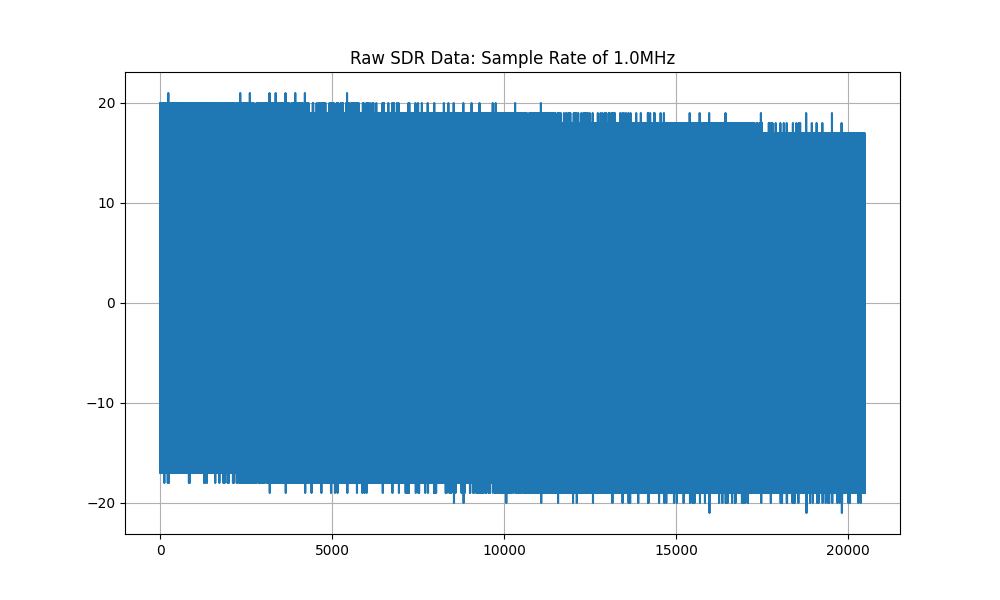

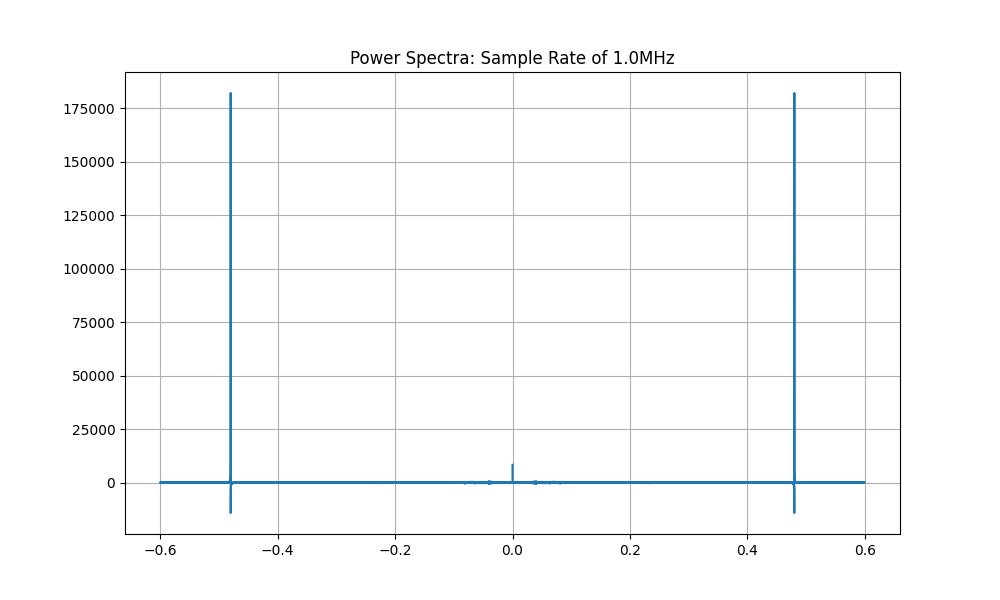

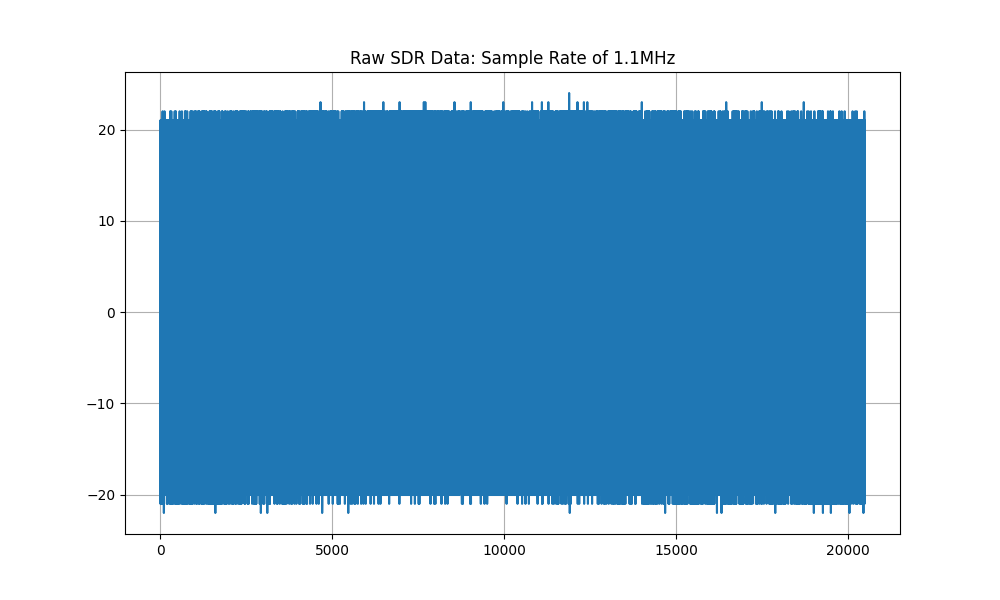

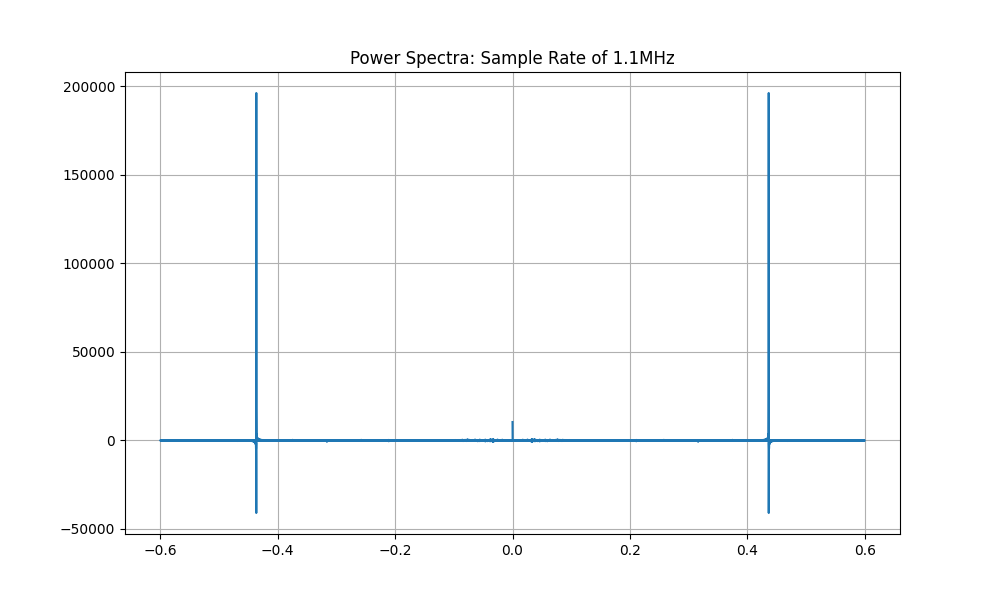

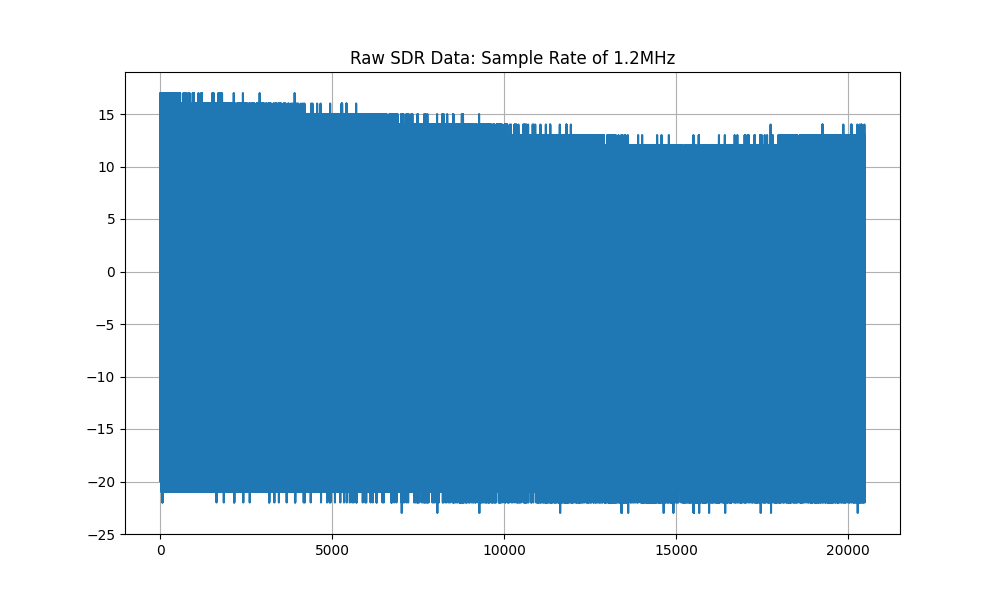

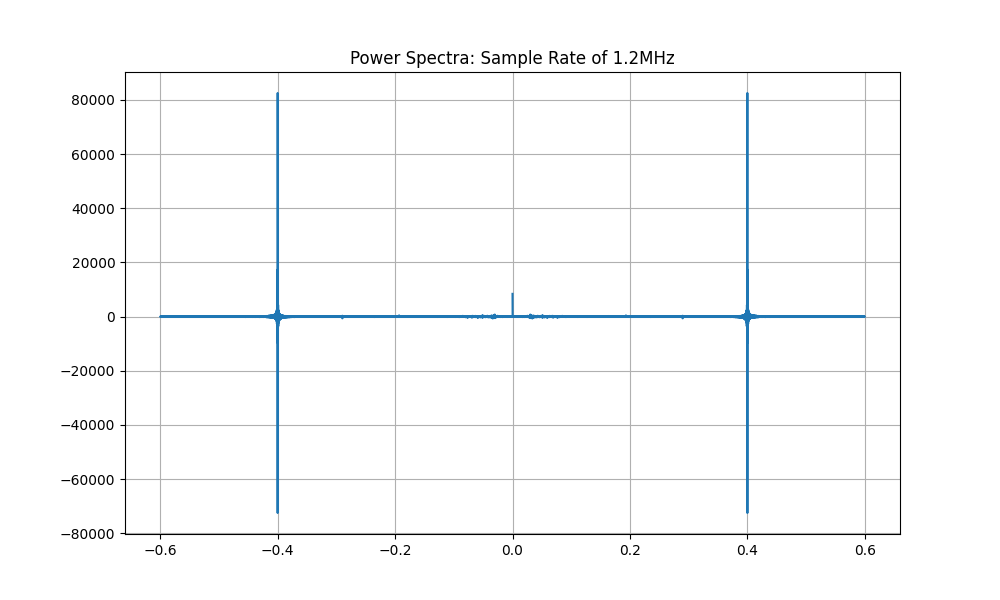

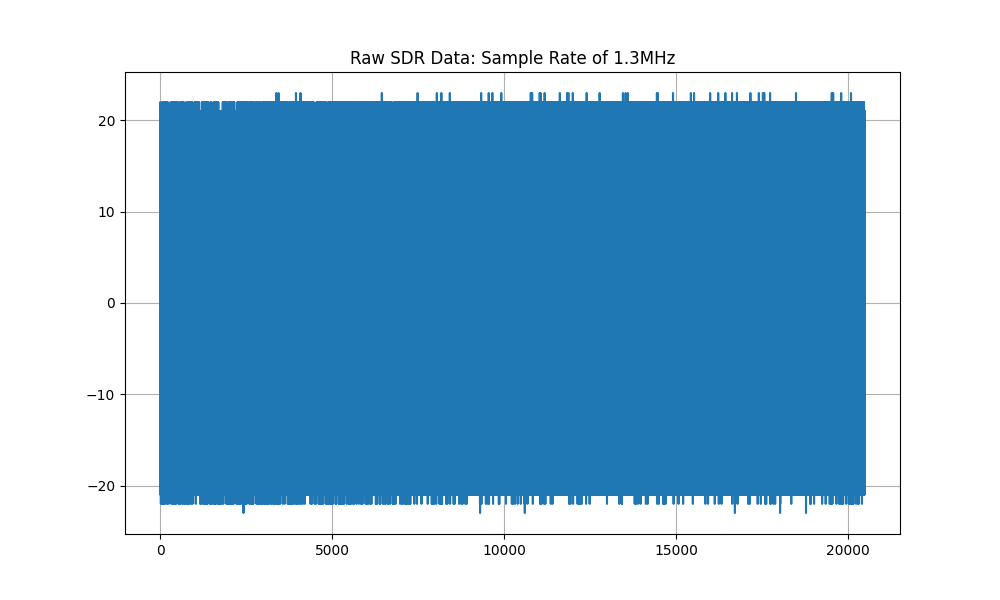

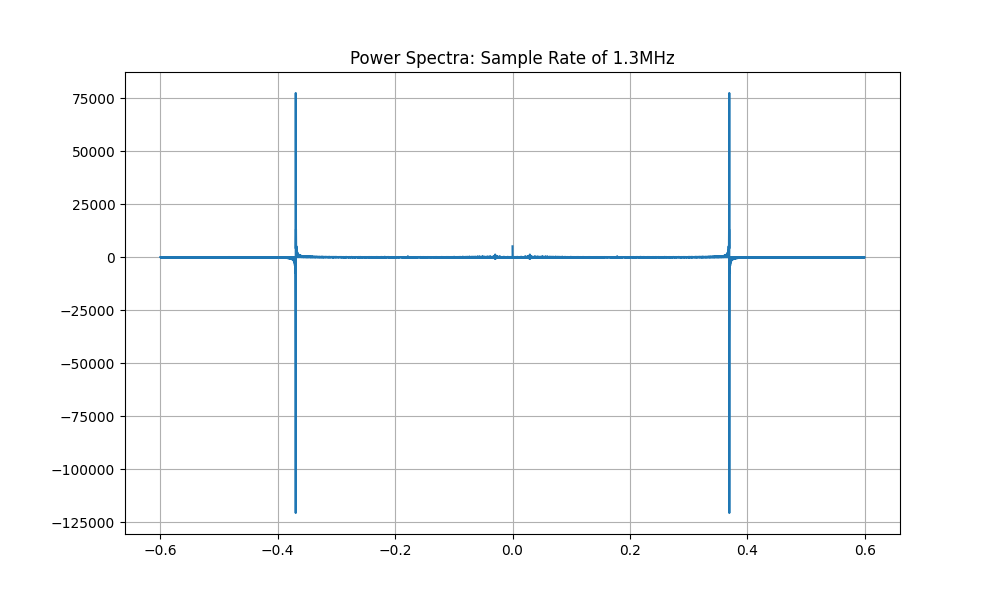

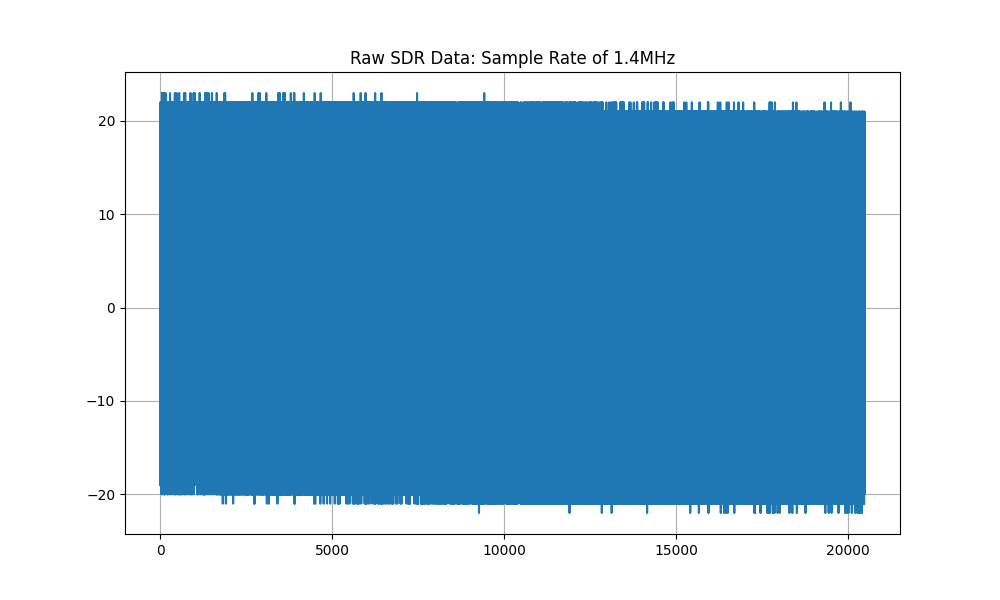

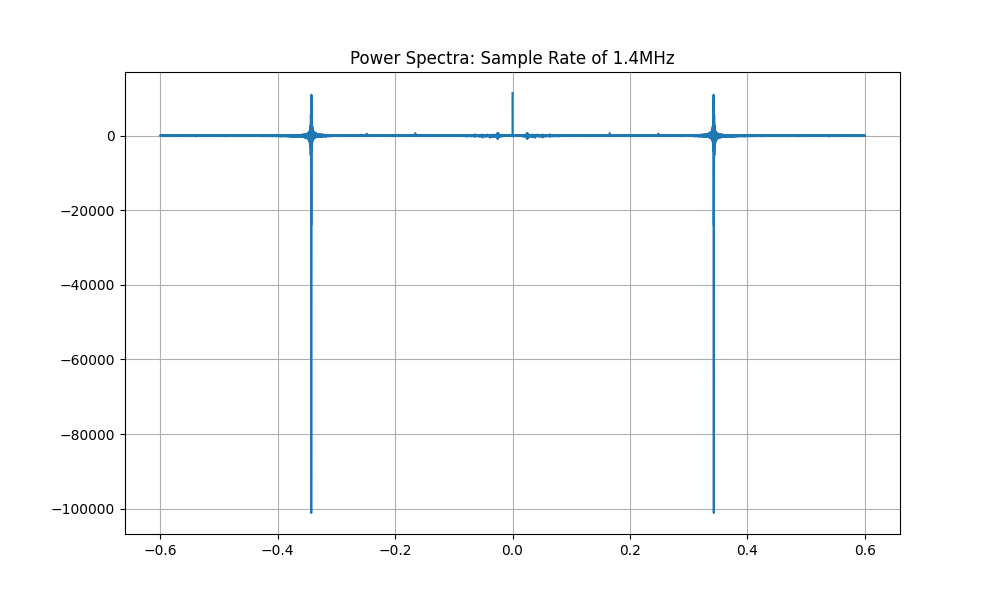

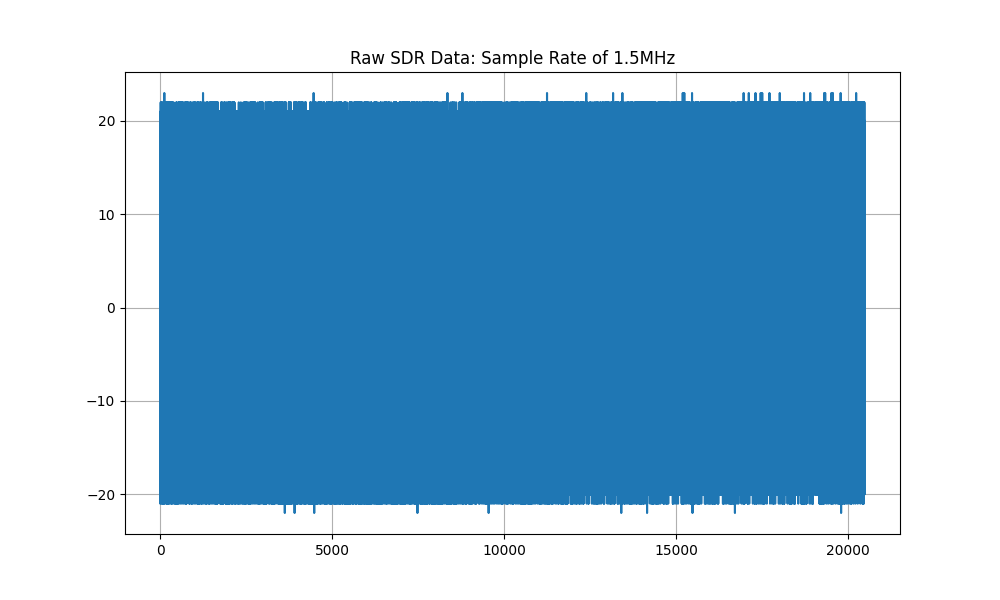

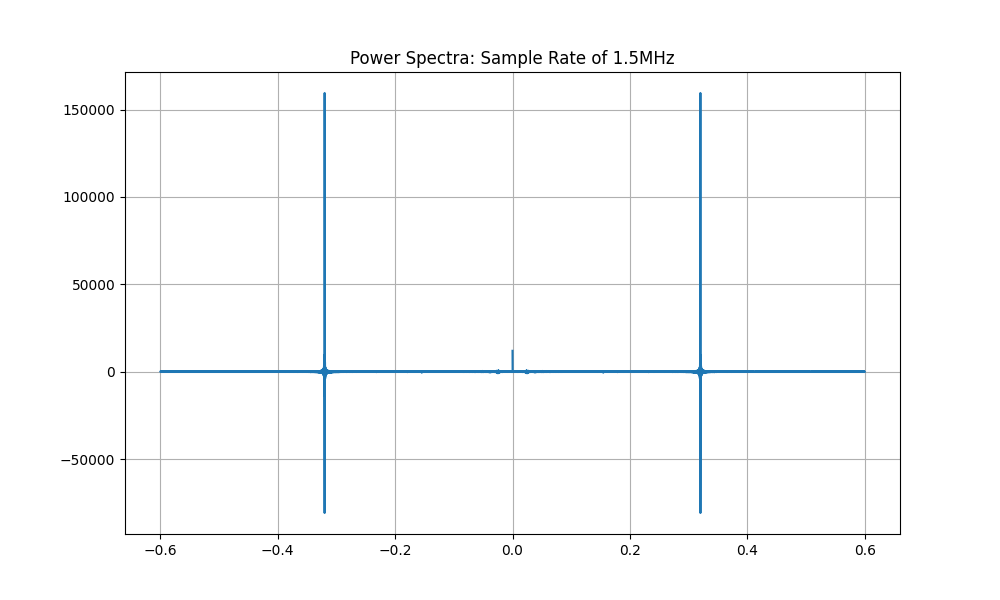

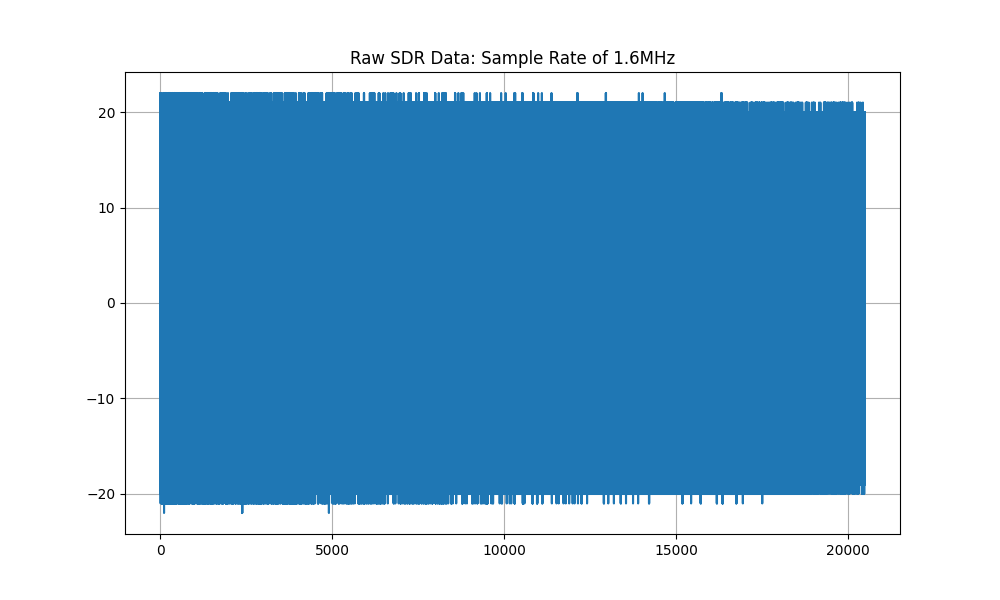

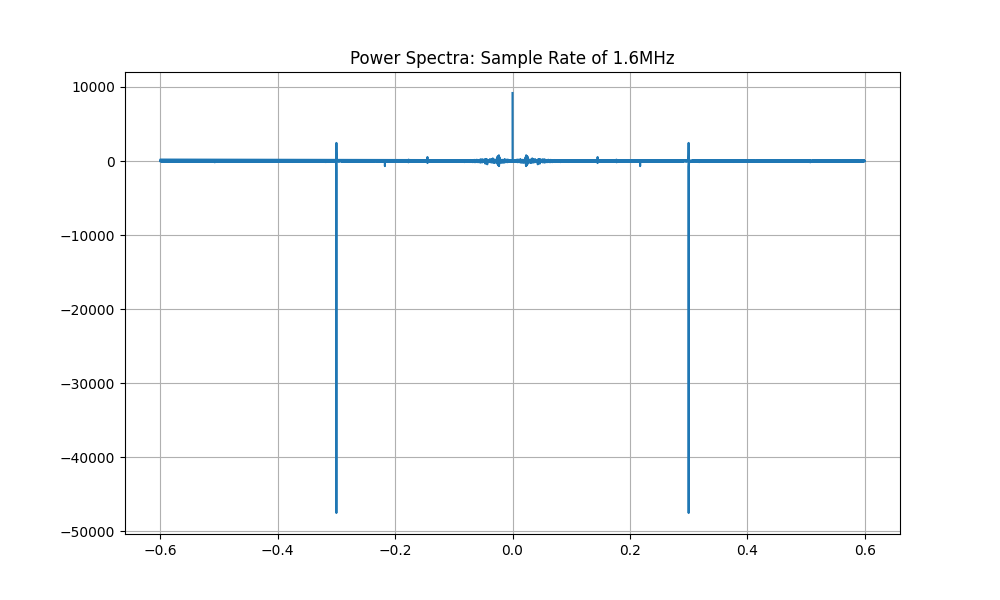

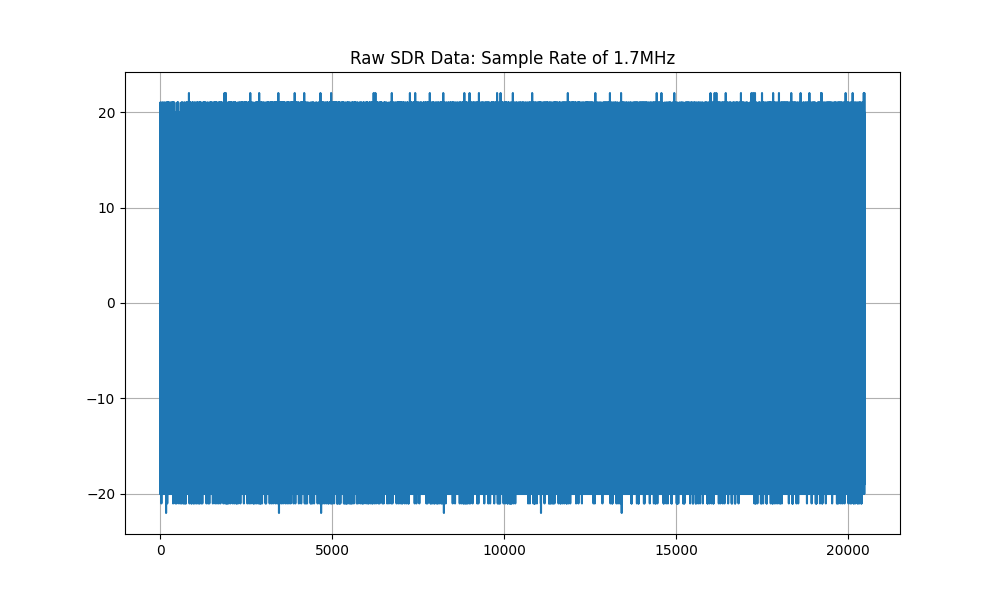

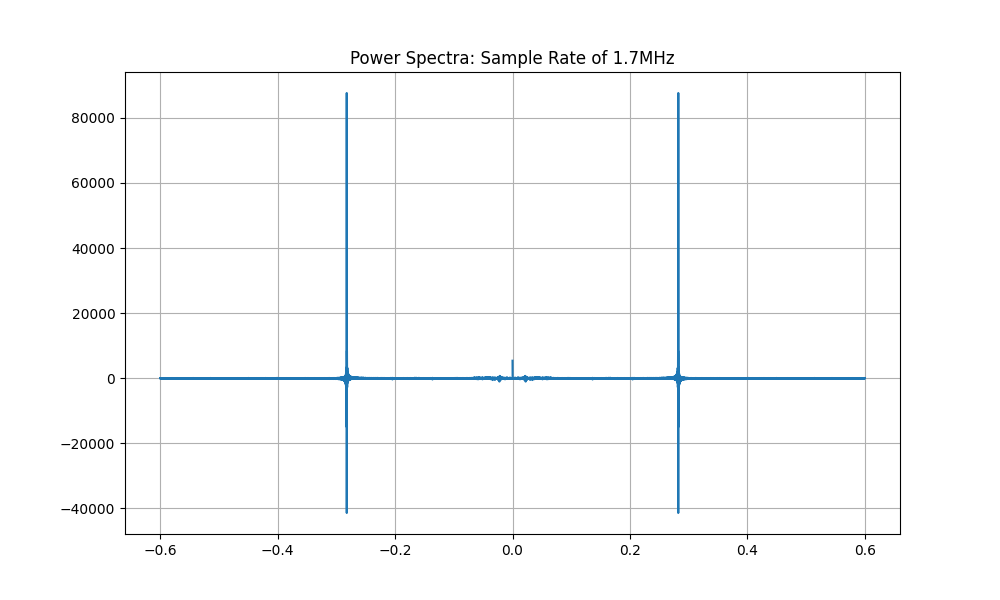

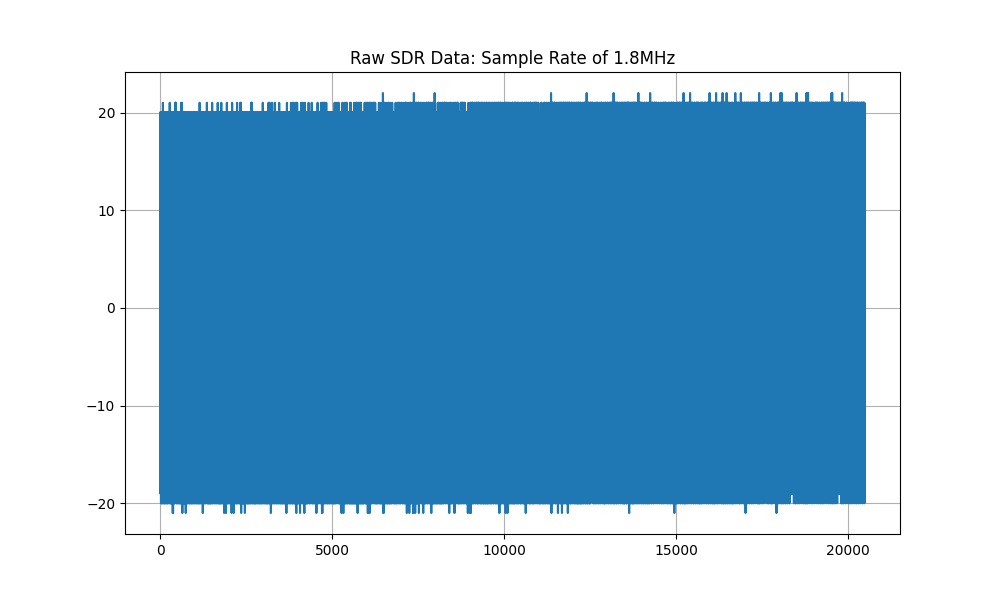

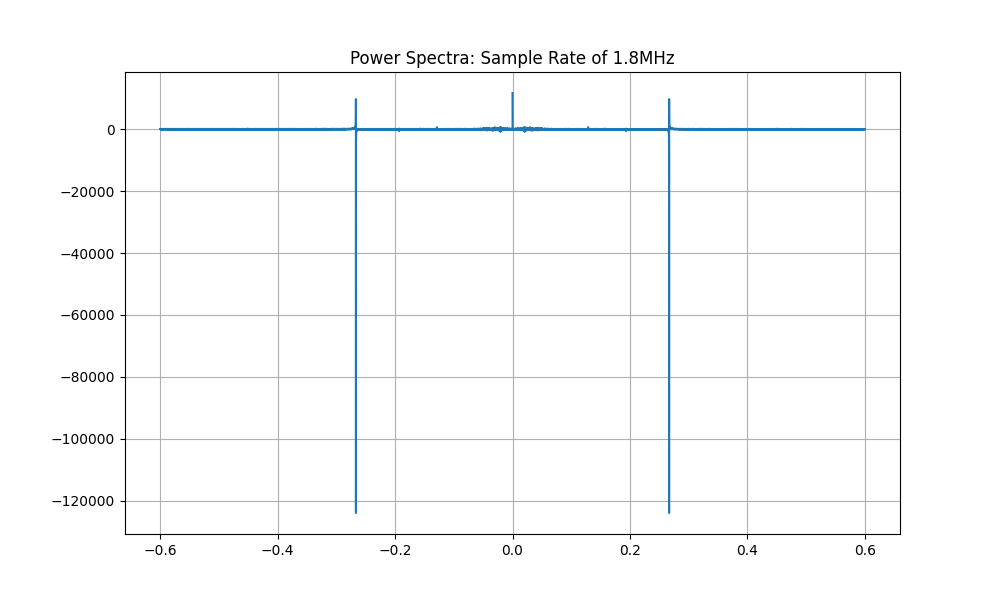

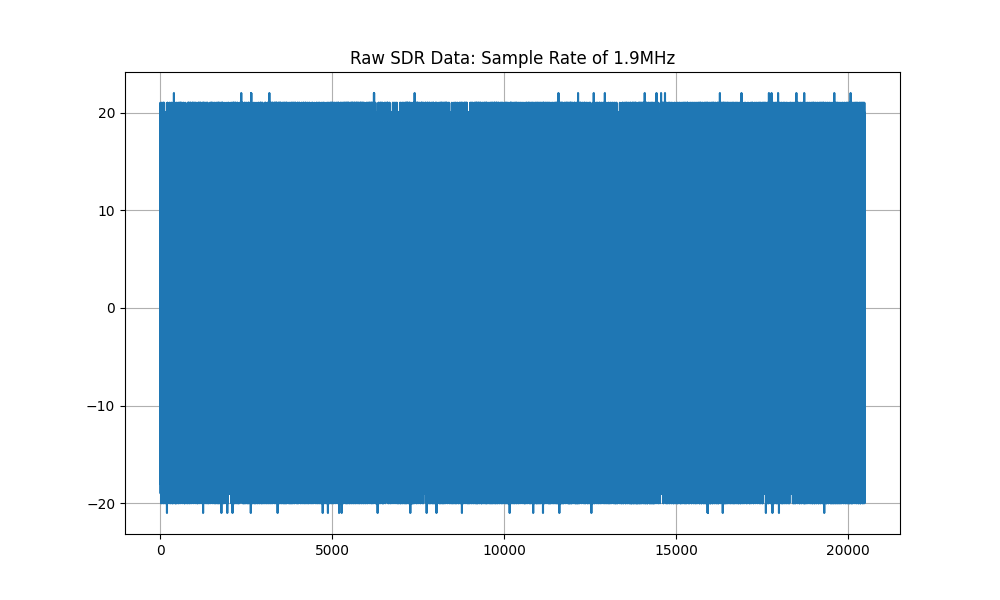

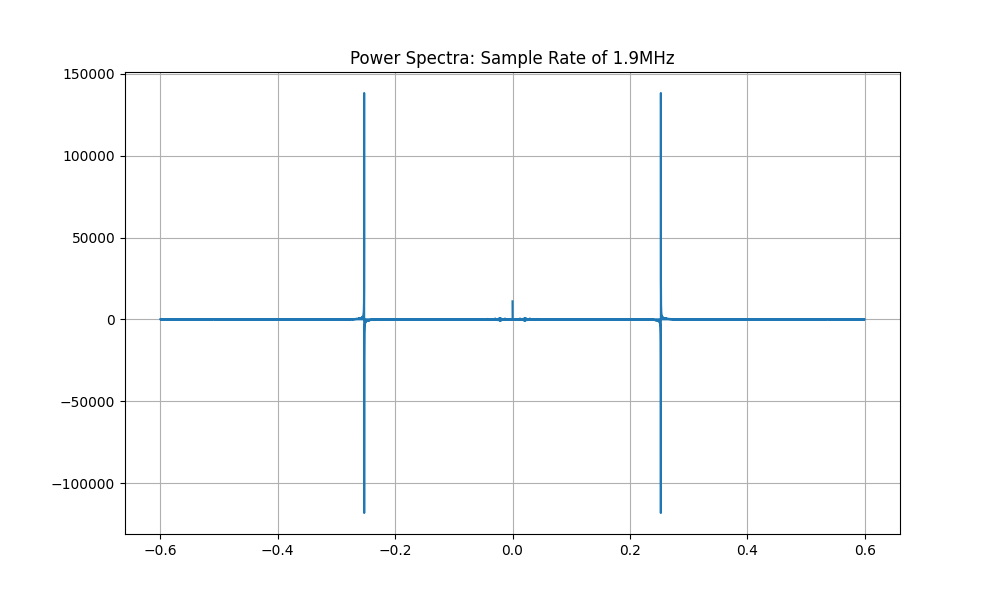

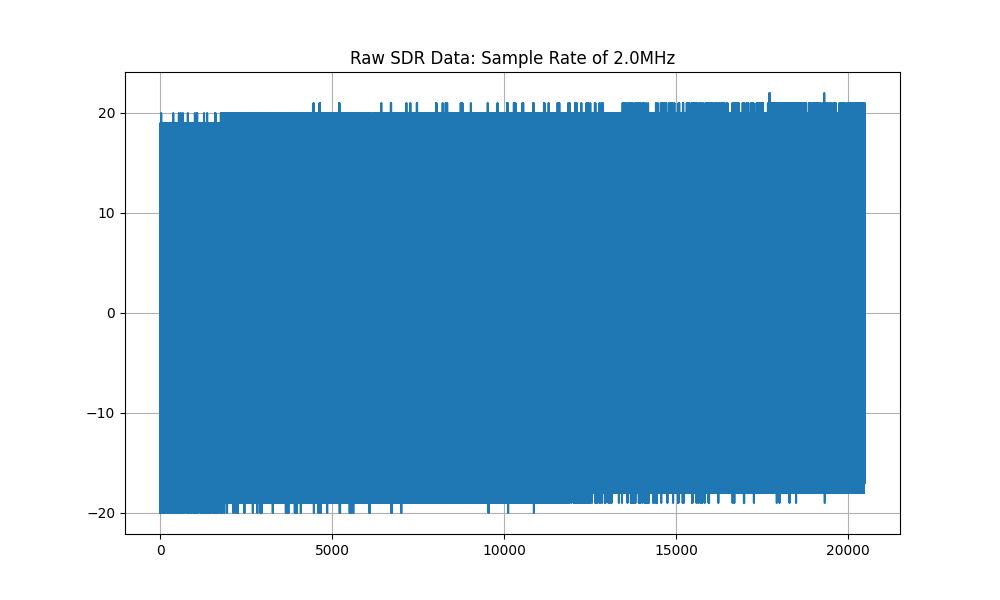

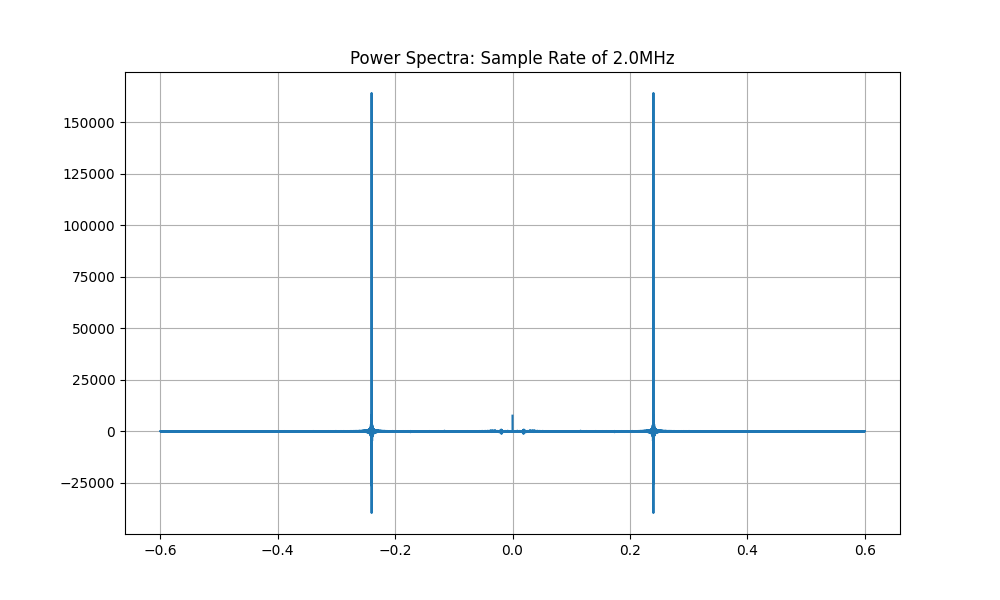

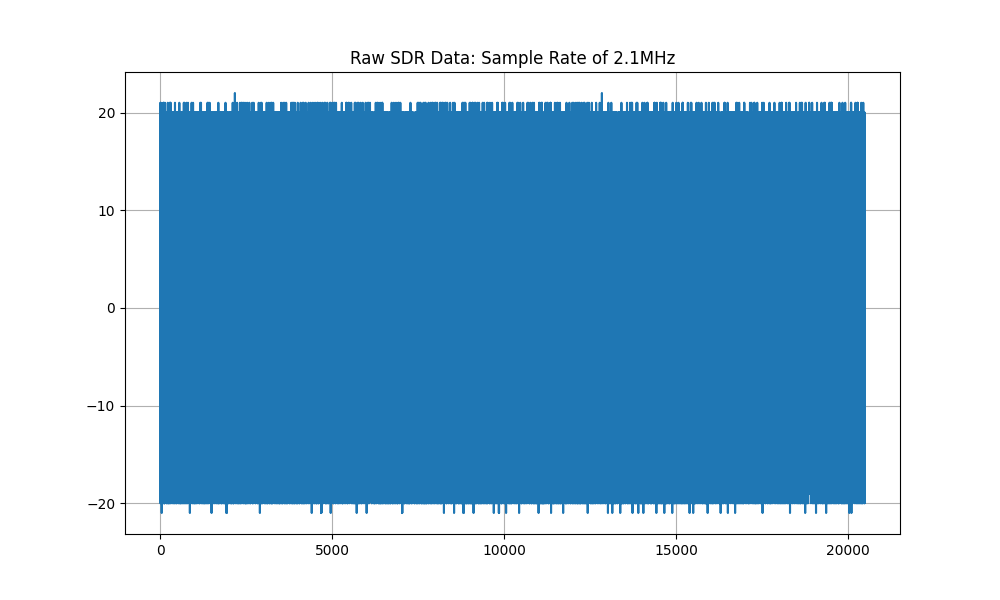

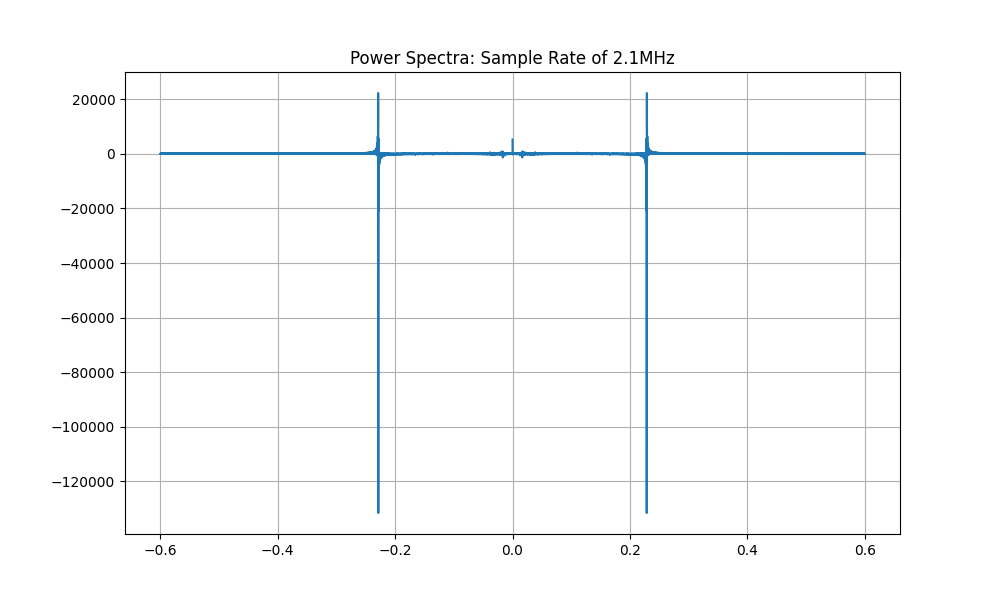

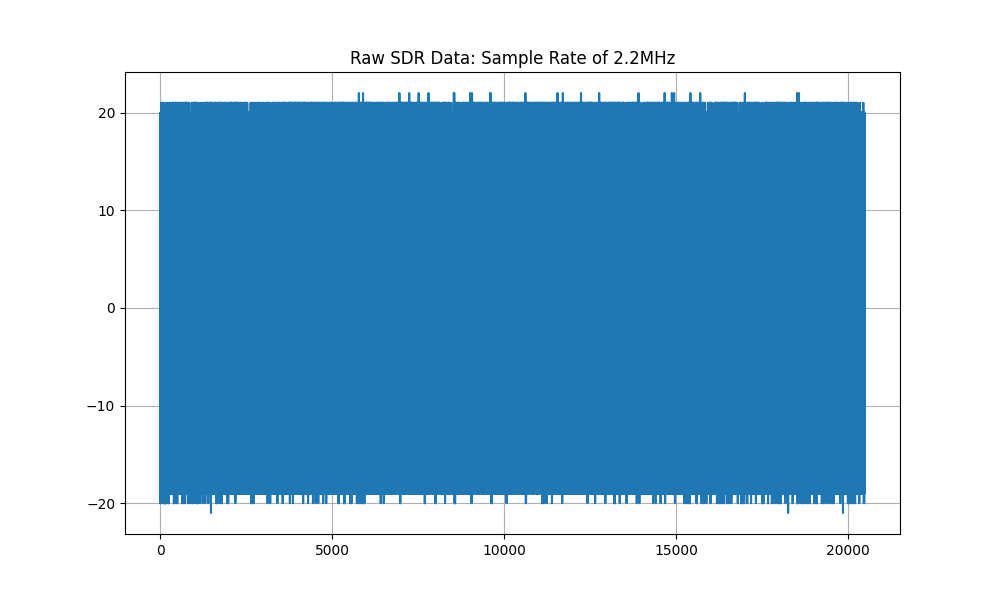

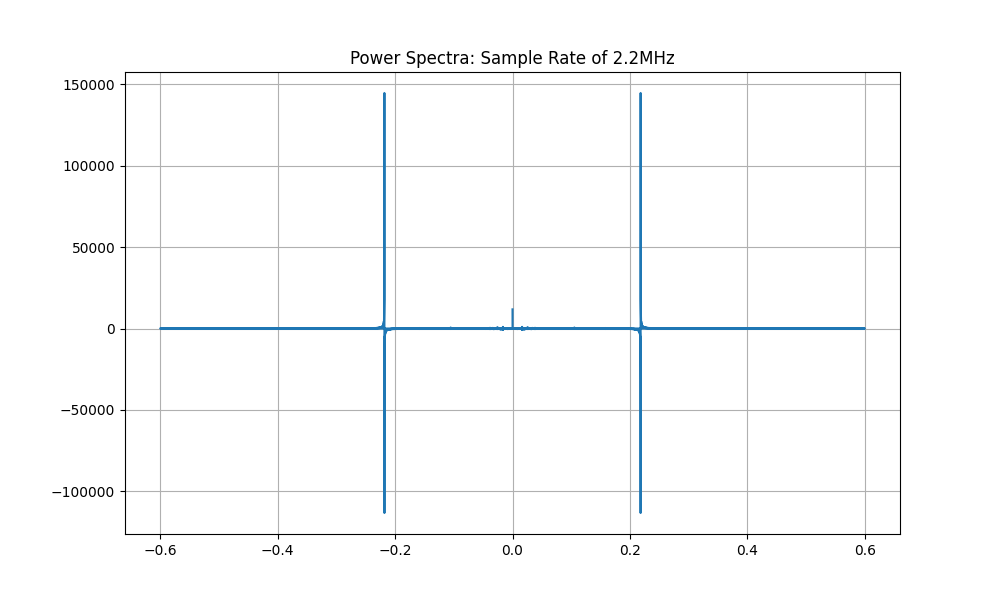

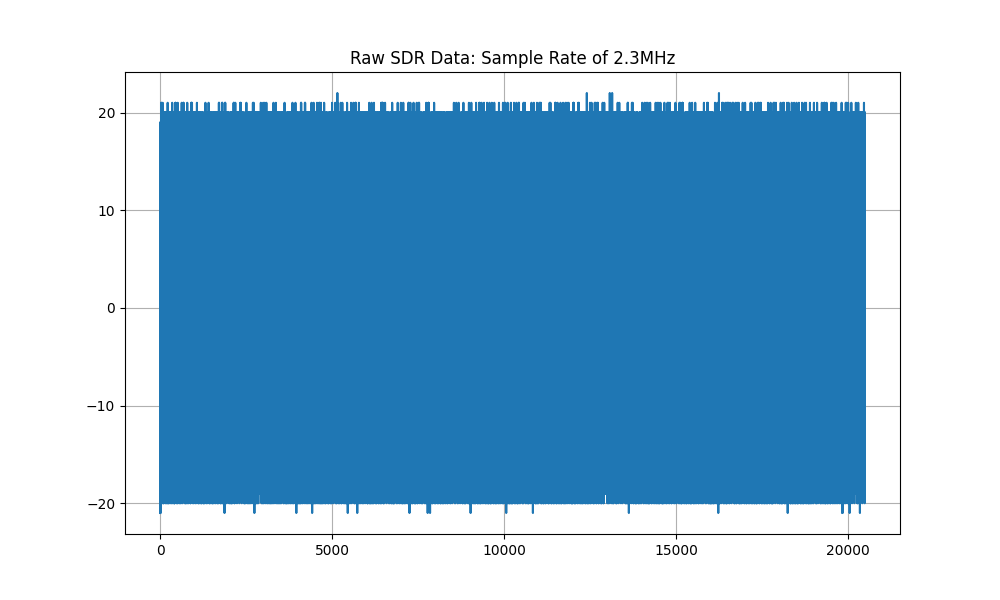

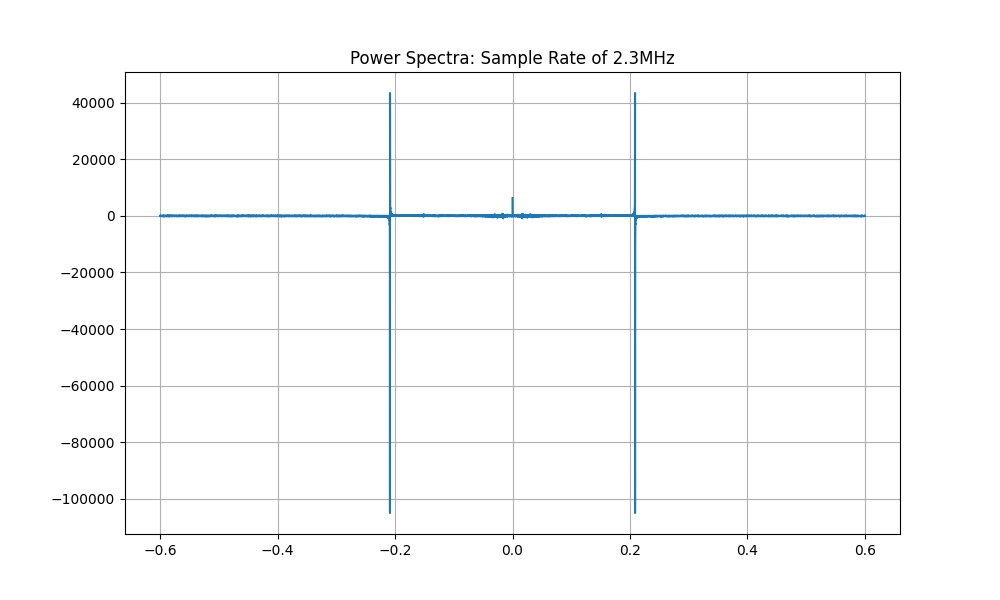

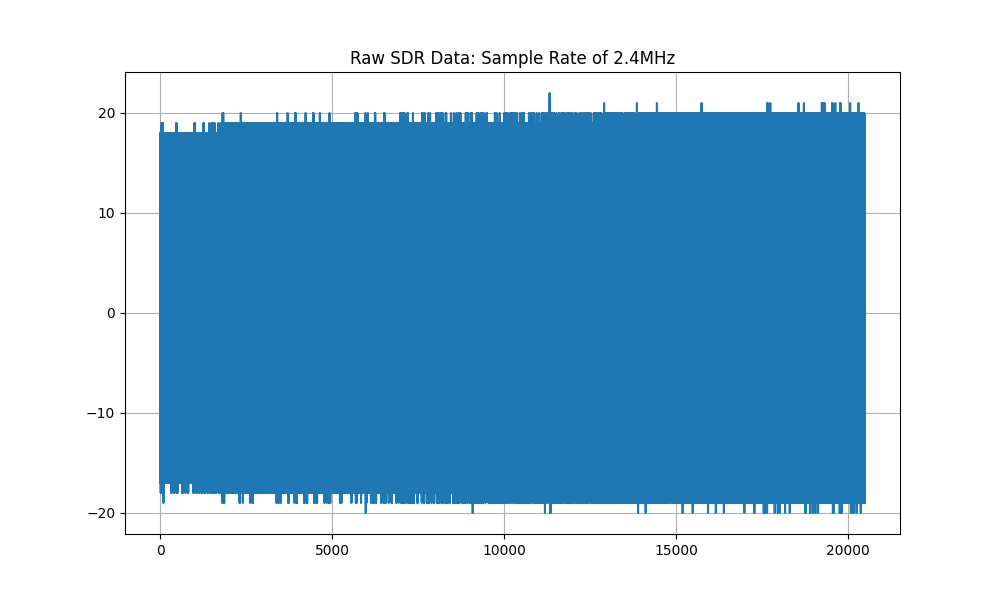

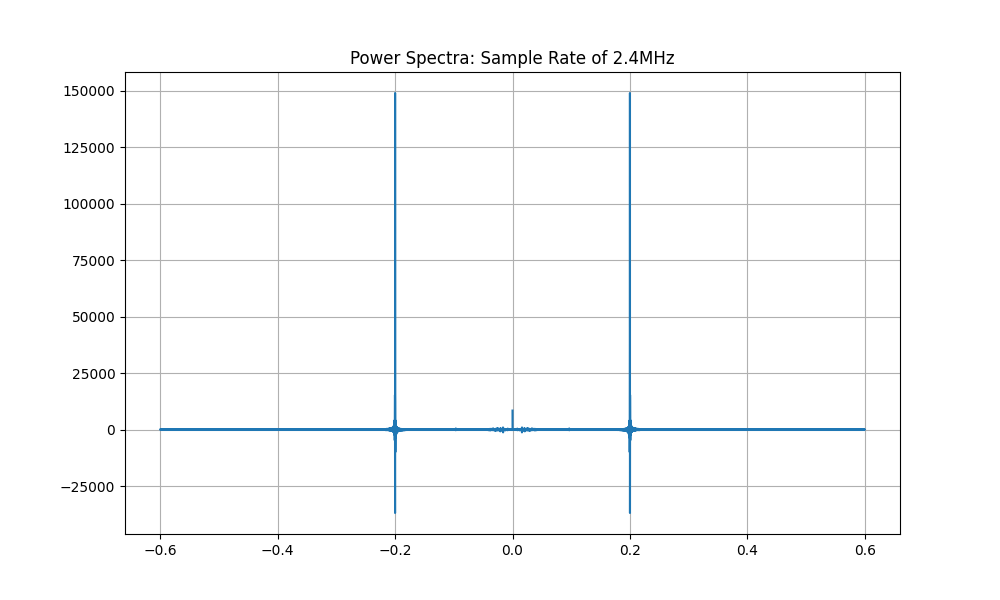

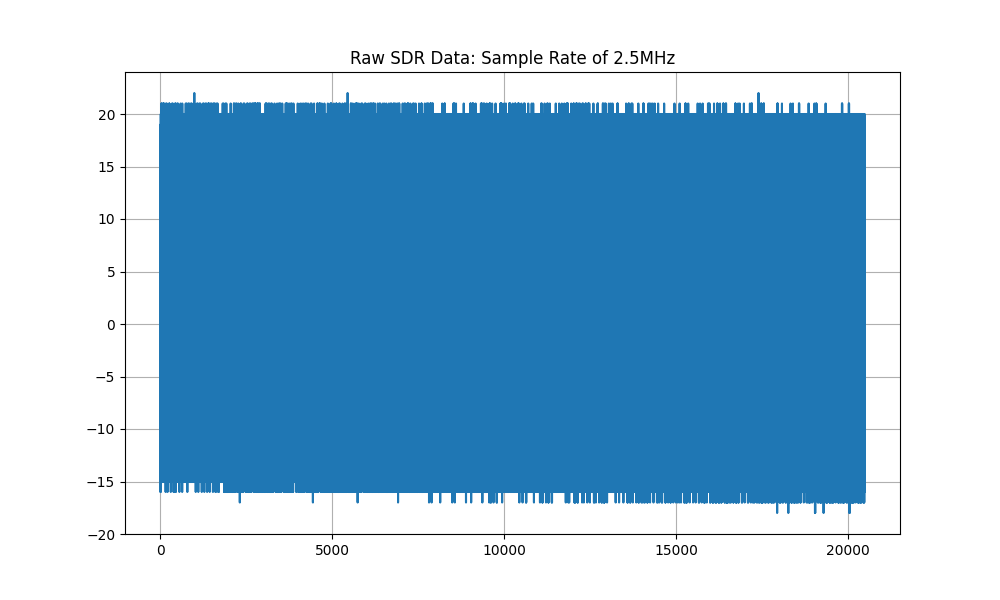

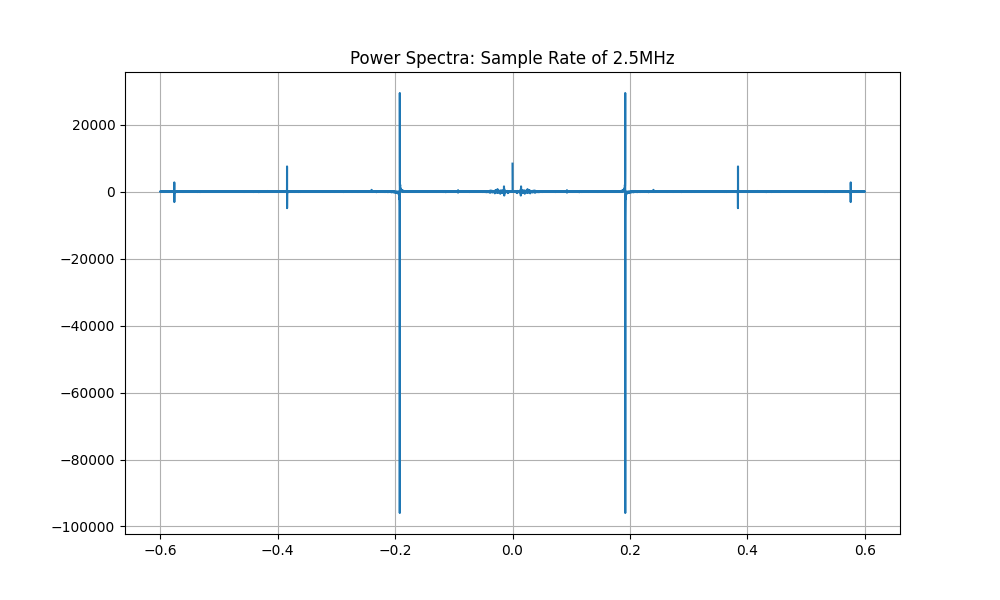

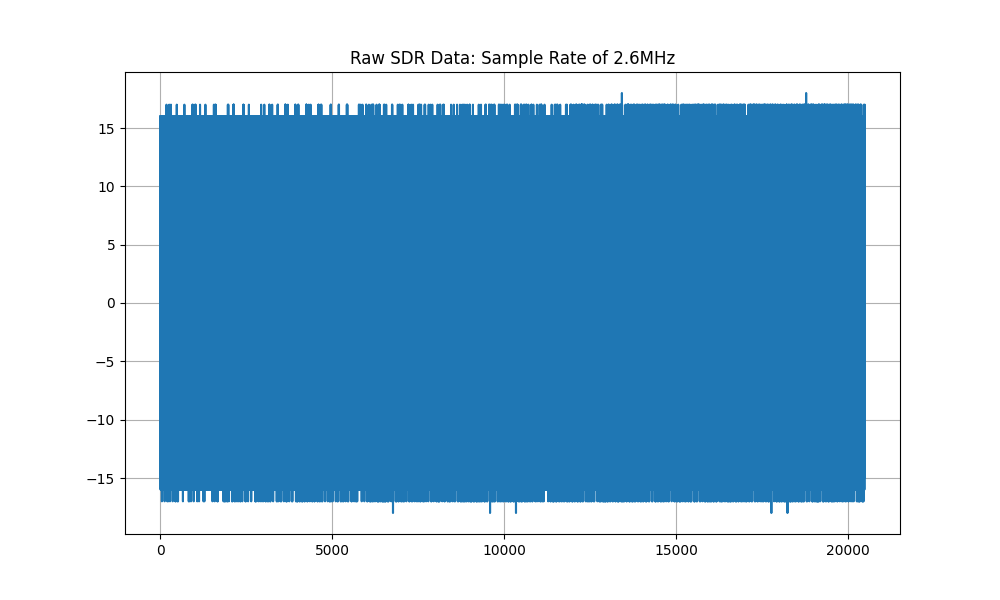

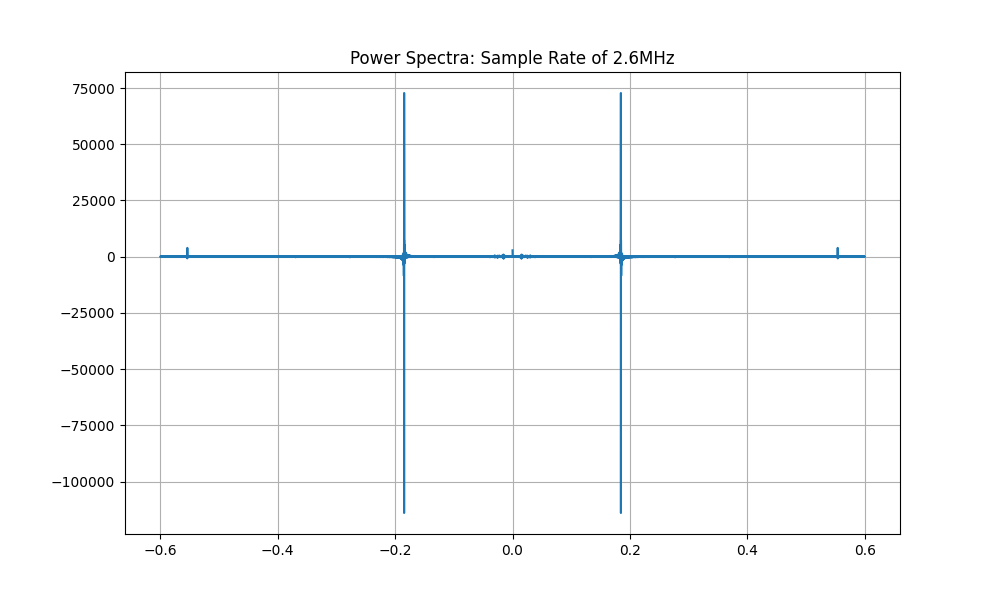

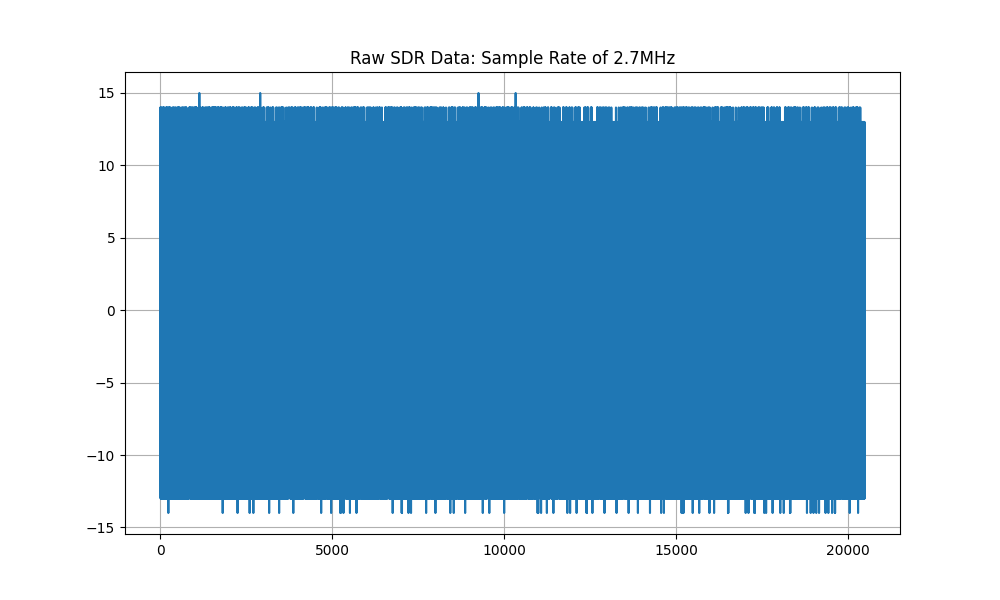

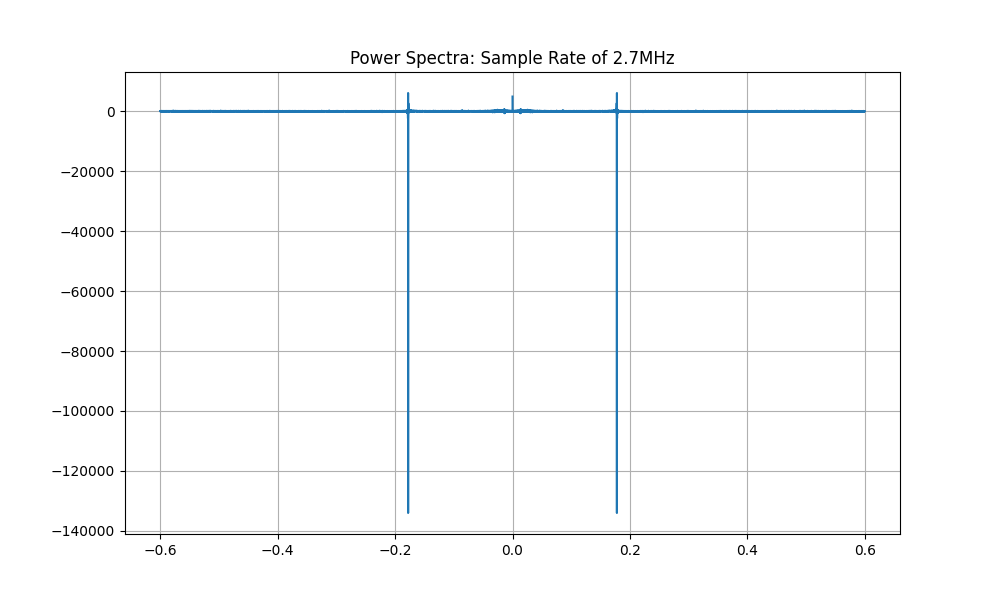

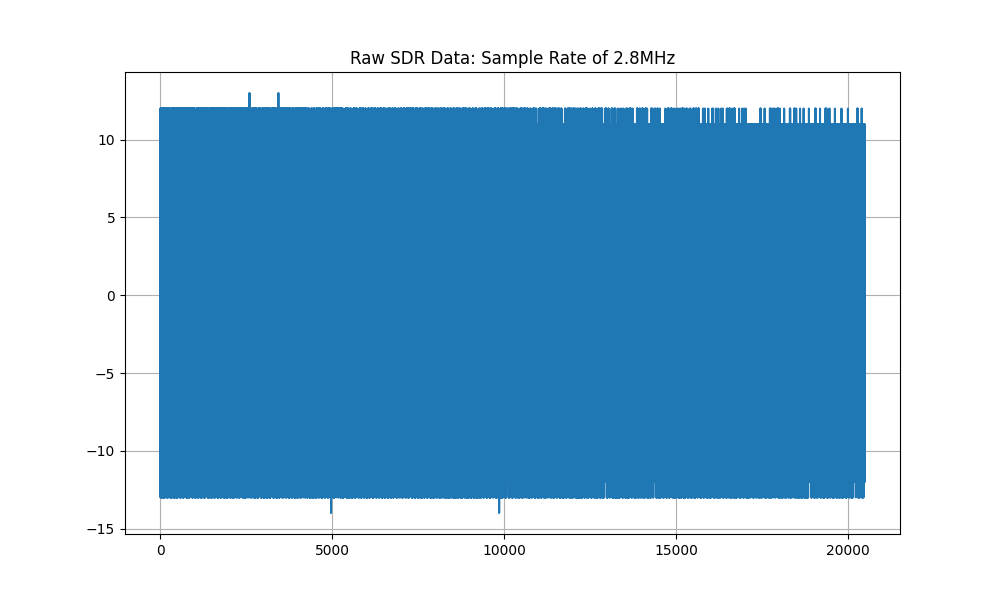

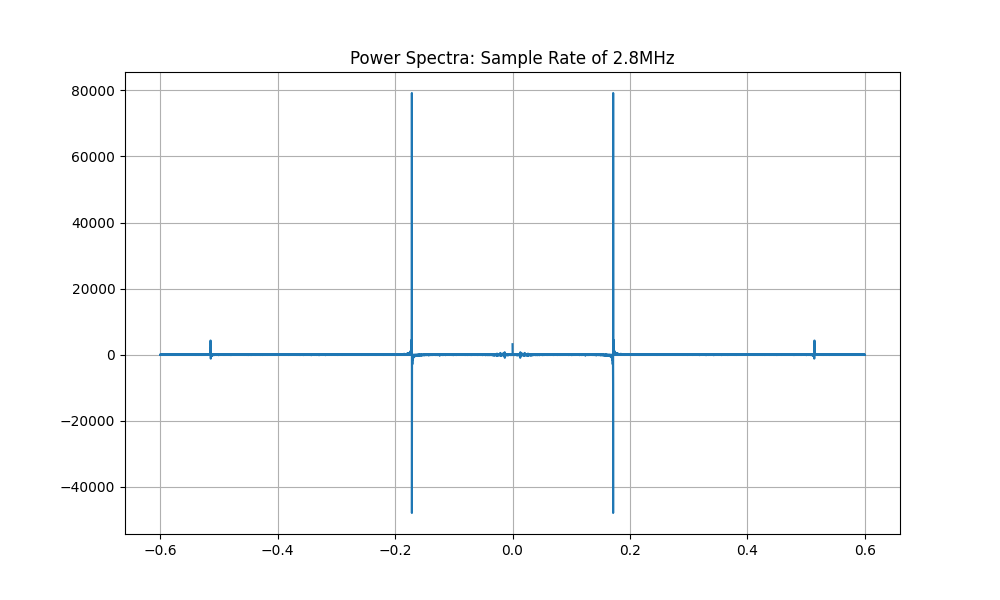

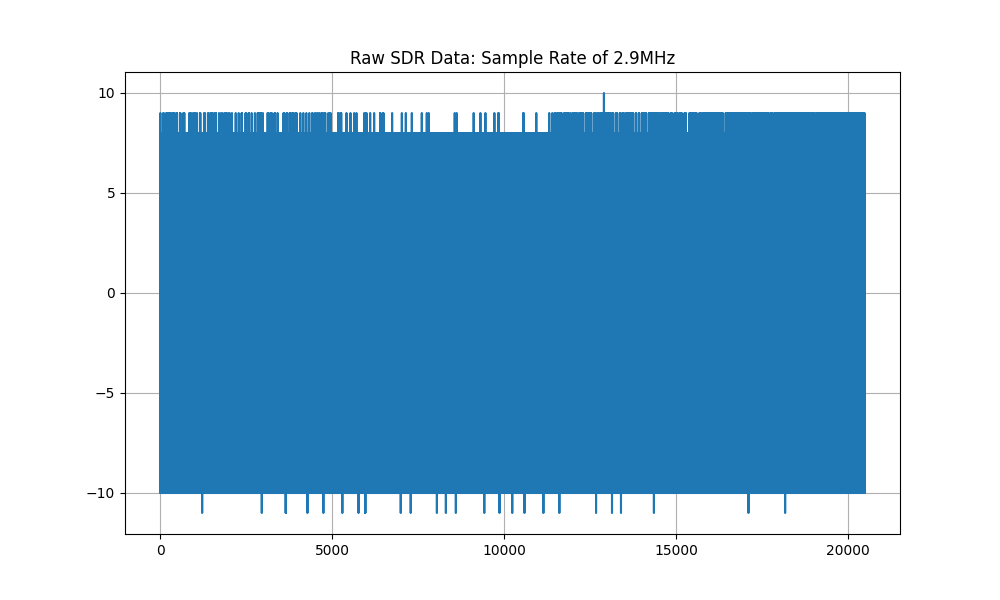

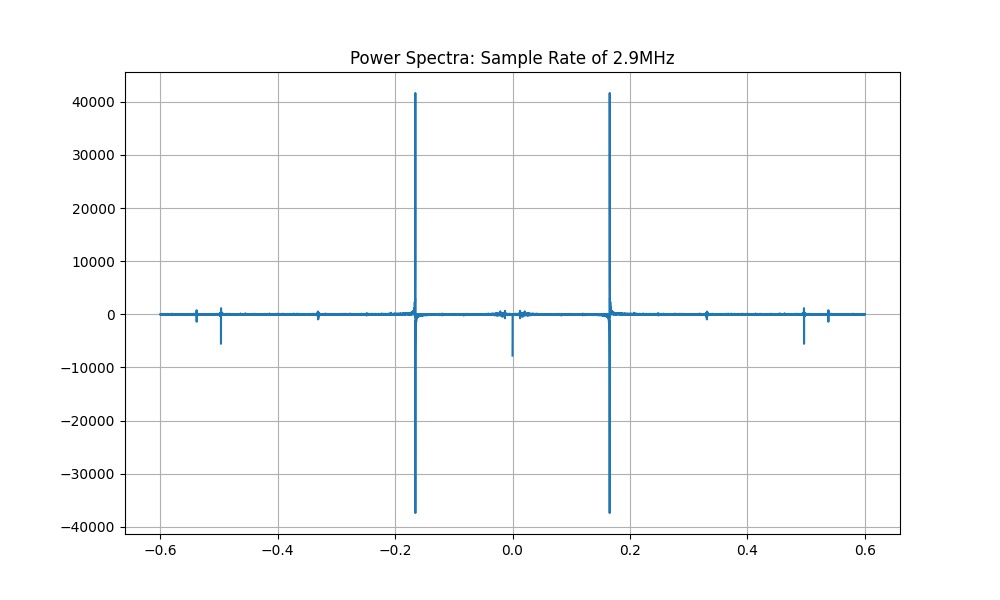

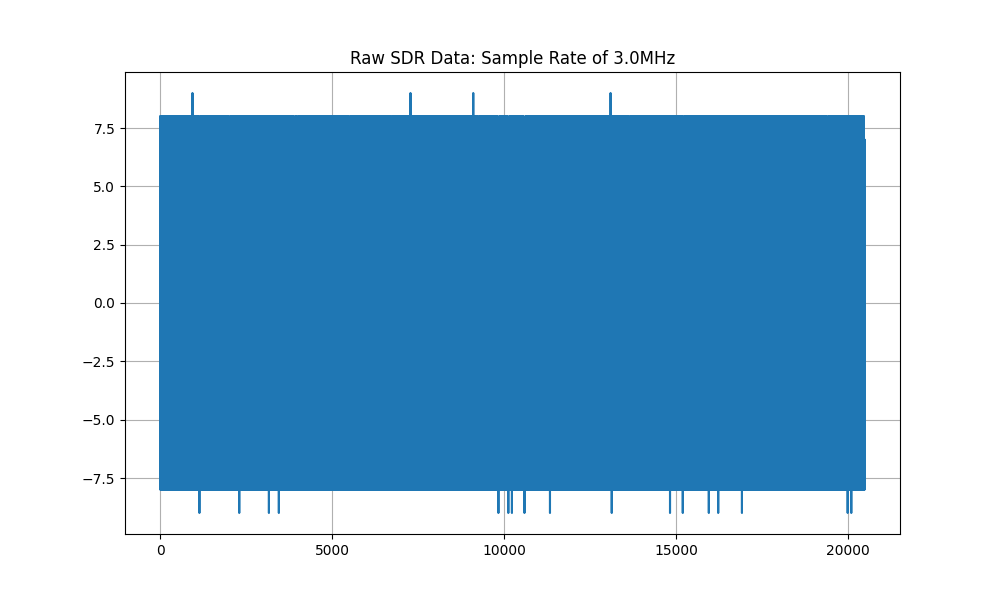

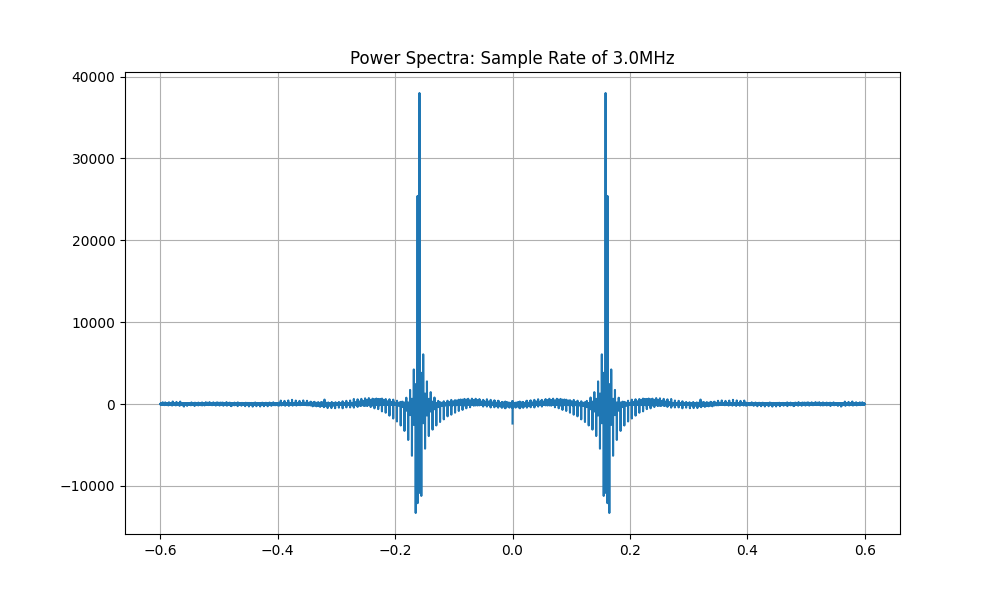

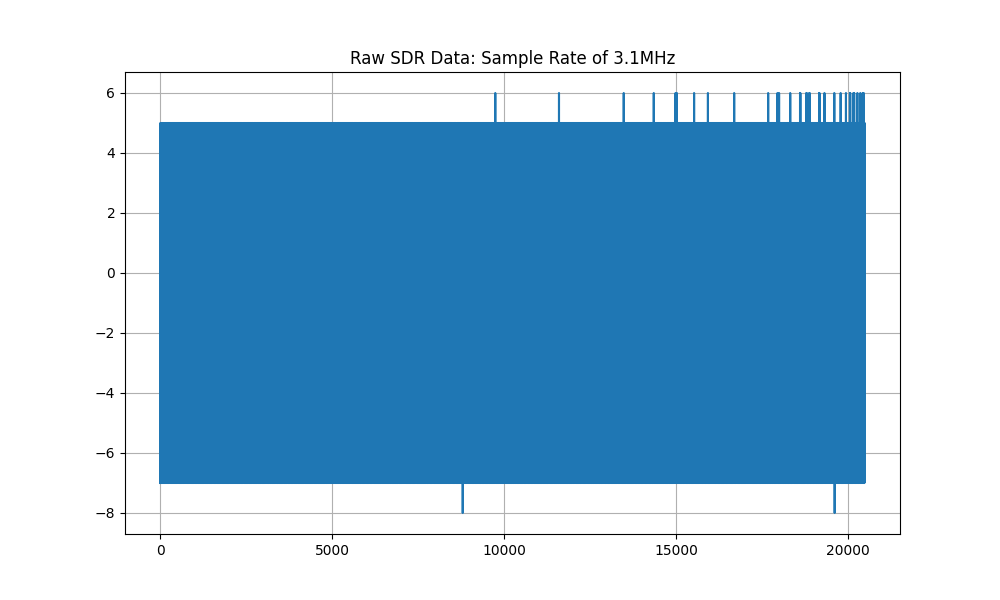

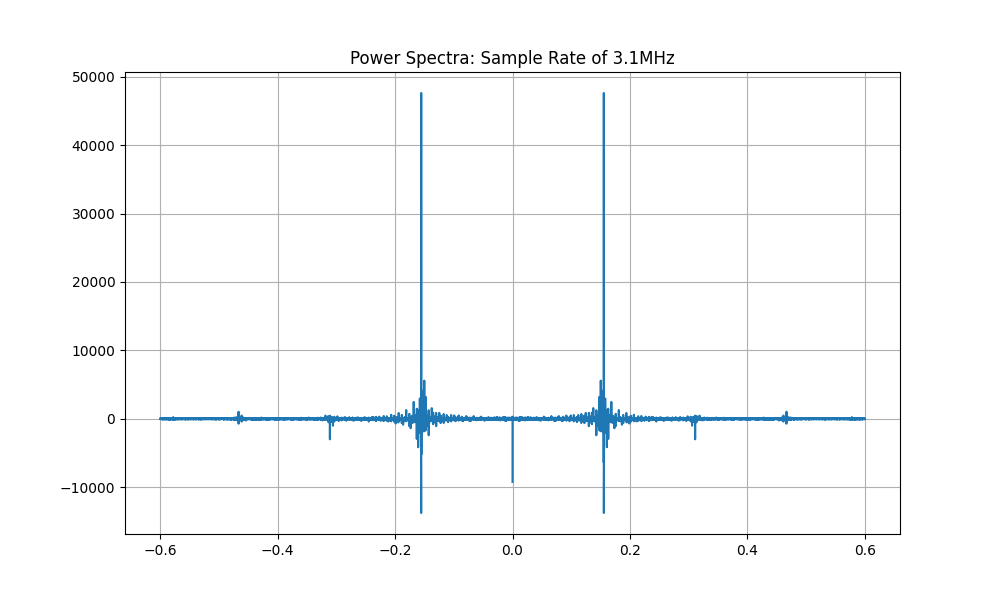

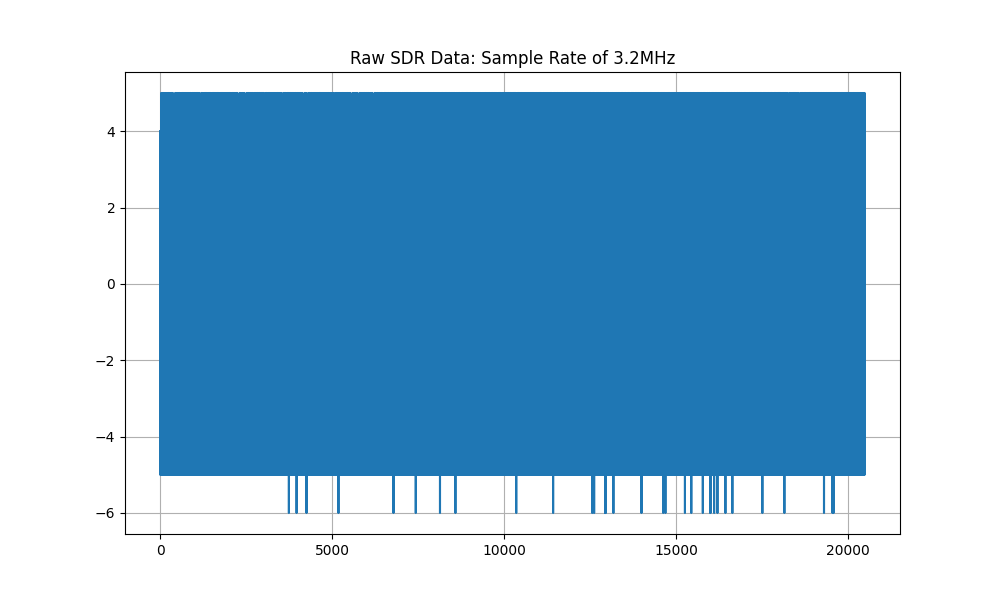

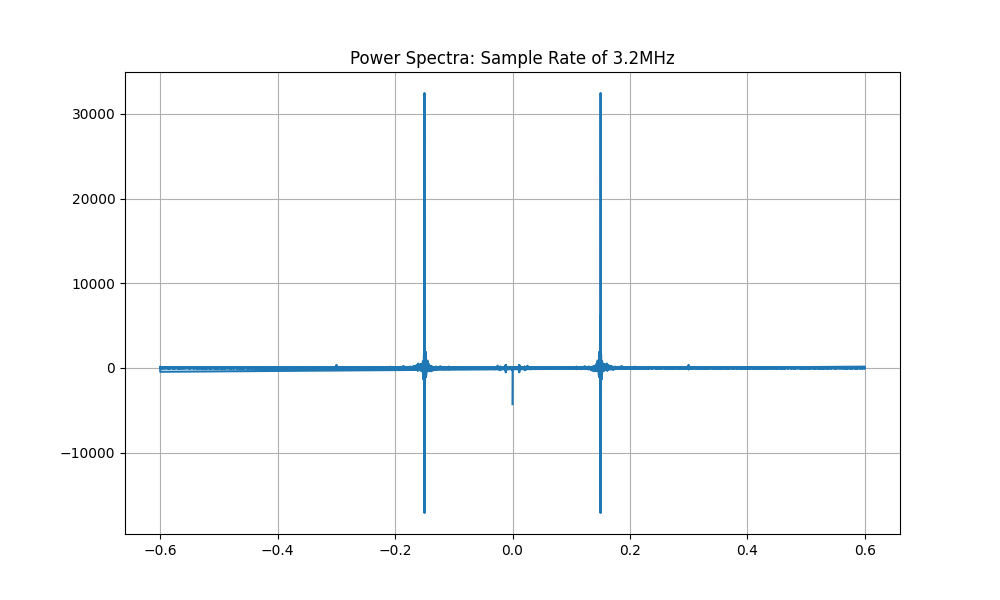

In [3]:
SAMPLE_RATES = np.arange(1e6, 3.3e6, 1e5)
for SAMPLE_RATE in SAMPLE_RATES:
    sdr_data = np.load(f"sdr_data/{SAMPLE_RATE}_sdr_data.npz")
    plt.figure(figsize=(10, 6))
    full_sdr = np.concatenate(sdr_data['arr_0'])
    plt.plot(full_sdr)
    plt.grid(True)
    #ax = plt.gca()
    #ax.set_xlim([4000, 4150])
    plt.title(f"Raw SDR Data: Sample Rate of {SAMPLE_RATE/1e6}MHz")
    plt.show()

    plt.figure(figsize=(10, 6))
    fft_transform = np.fft.fft(full_sdr)
    freq = np.fft.fftfreq(20480, 1/1.2)
    plt.plot(freq, fft_transform.real)
    plt.grid(True)
    plt.title(f"Power Spectra: Sample Rate of {SAMPLE_RATE/1e6}MHz")
    plt.show()

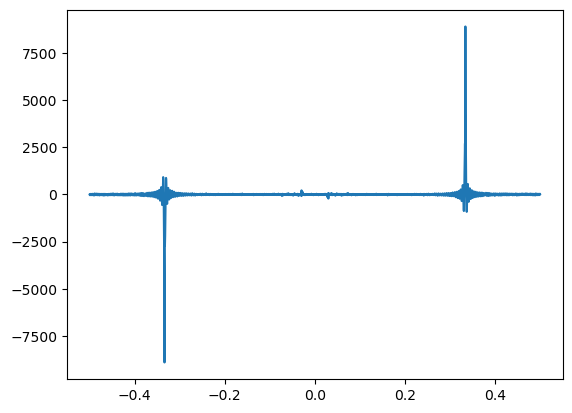

In [30]:
plt.plot(freq, fft_transform.imag)

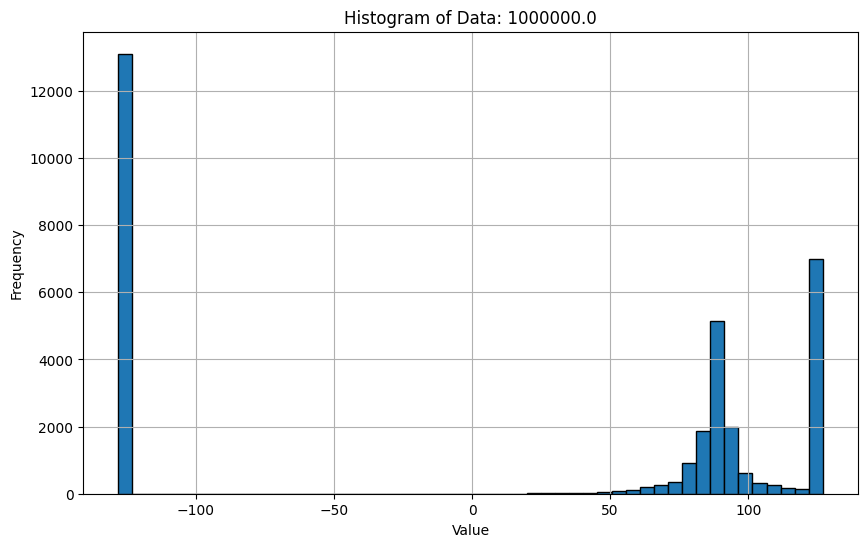

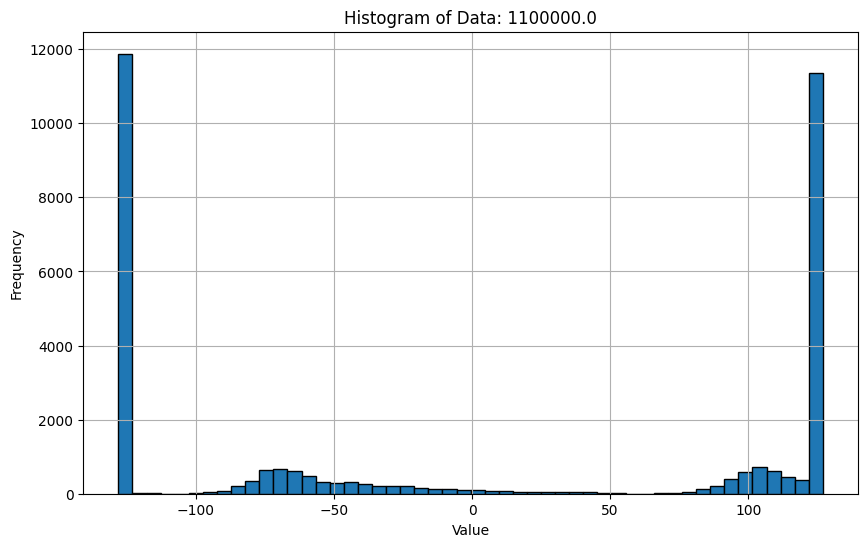

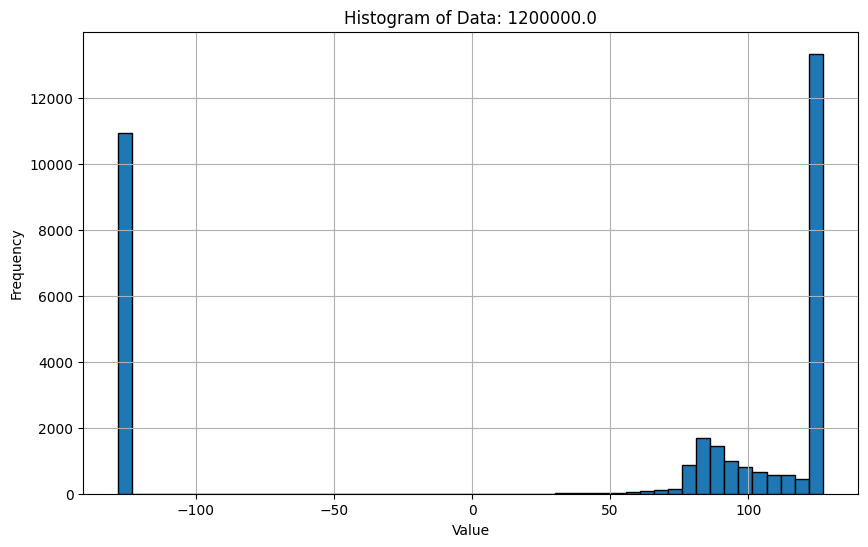

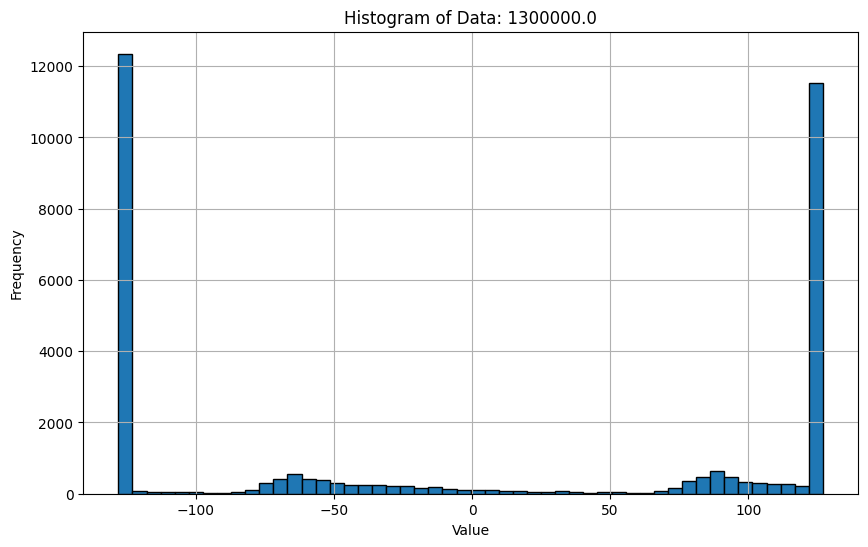

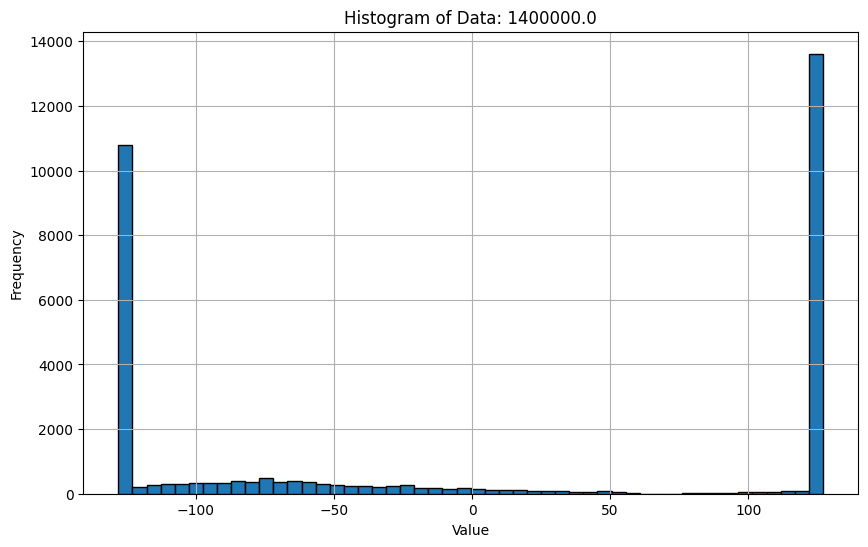

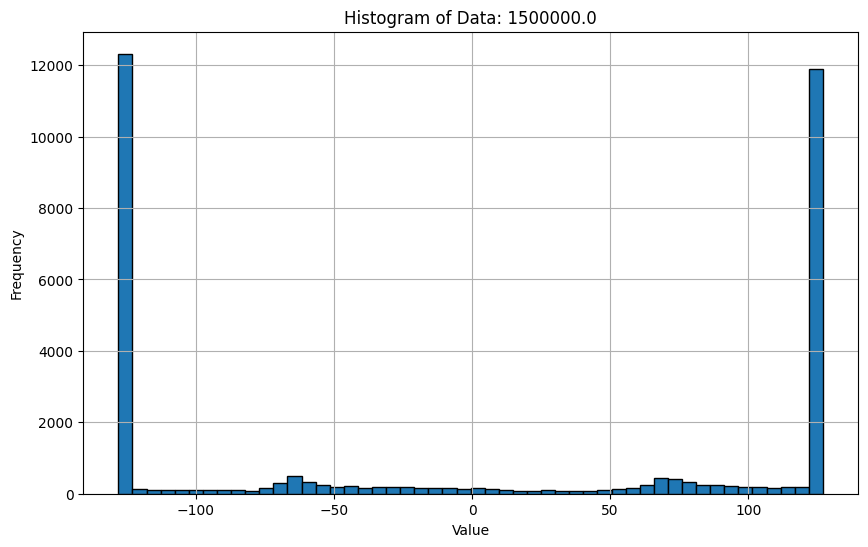

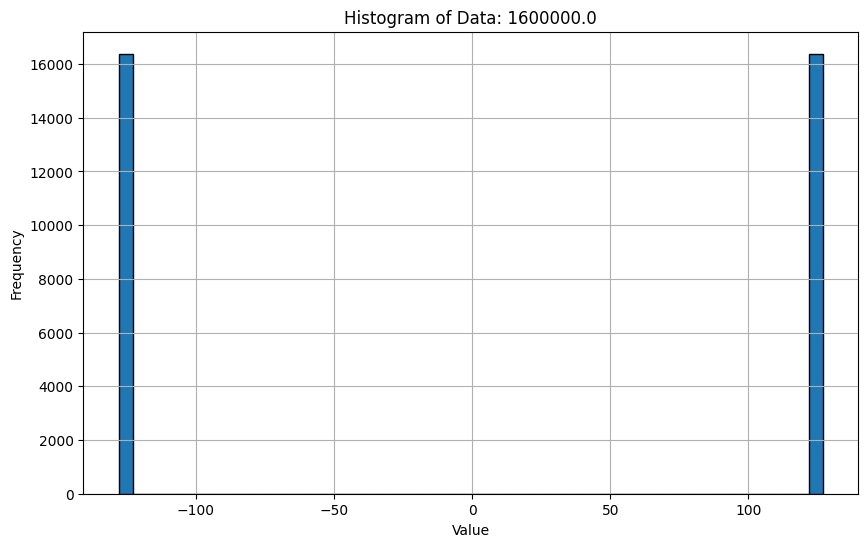

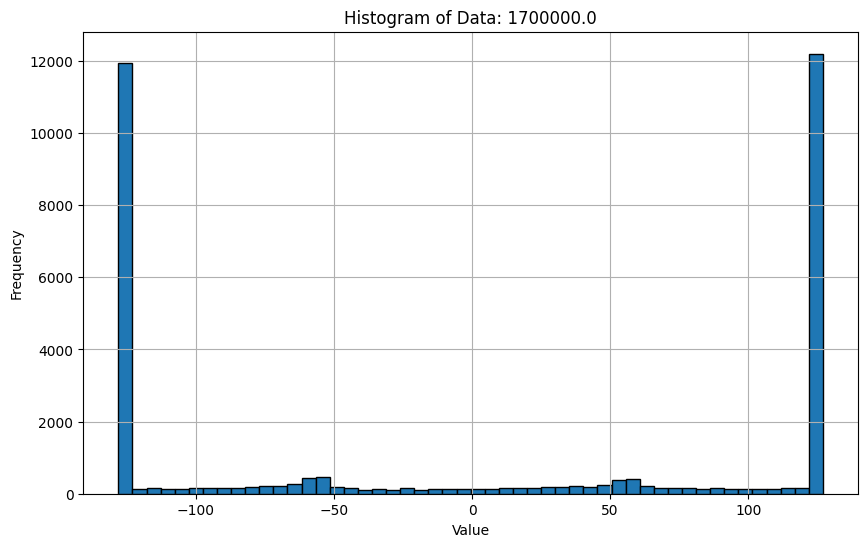

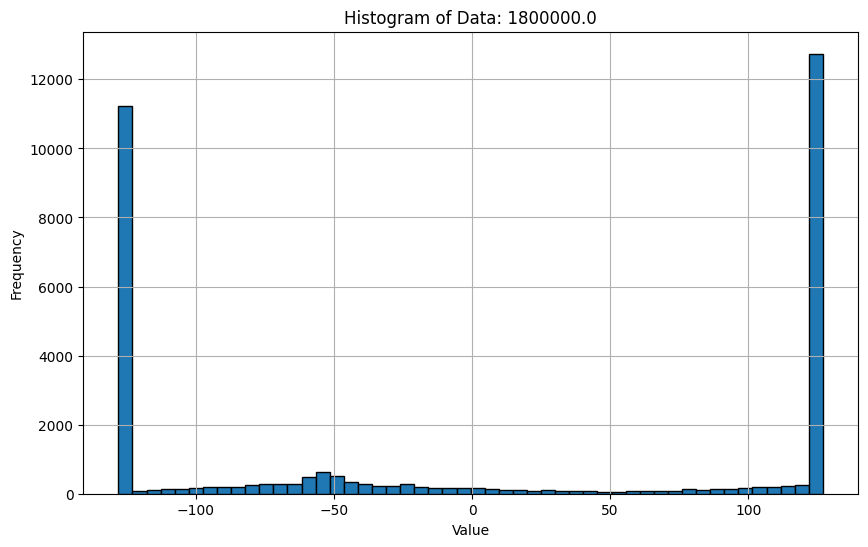

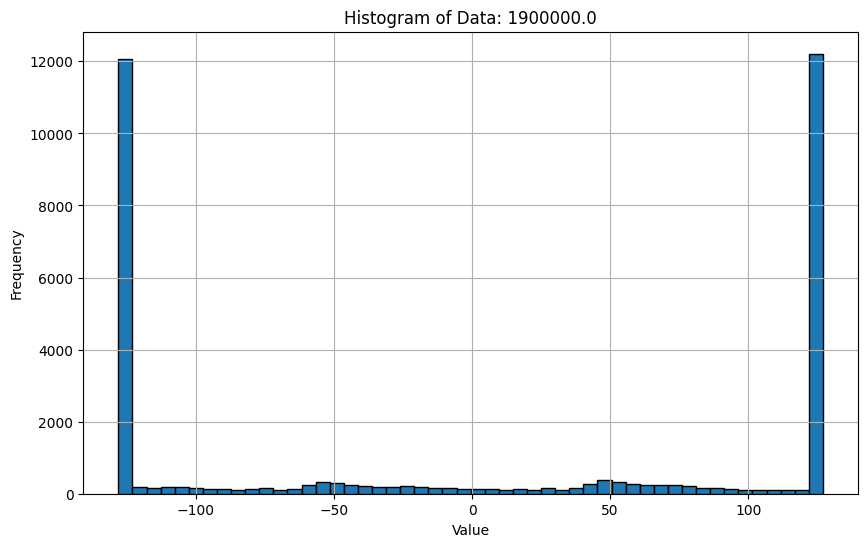

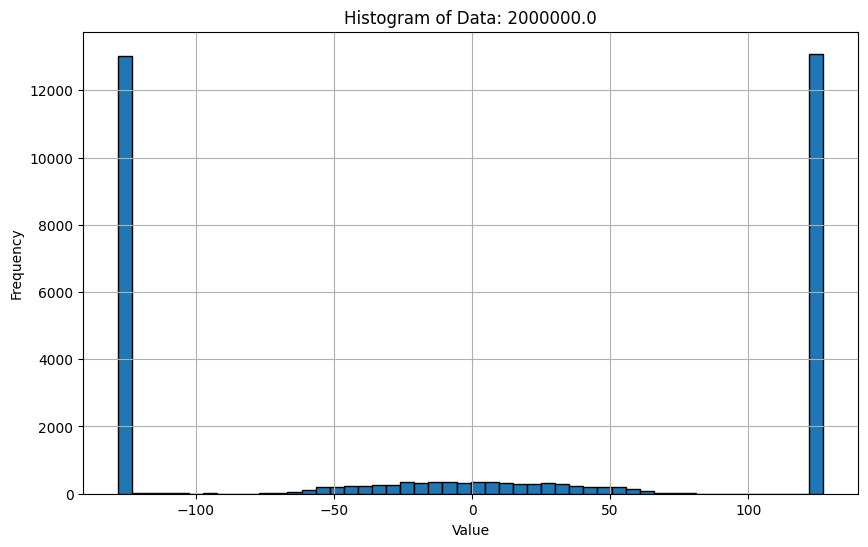

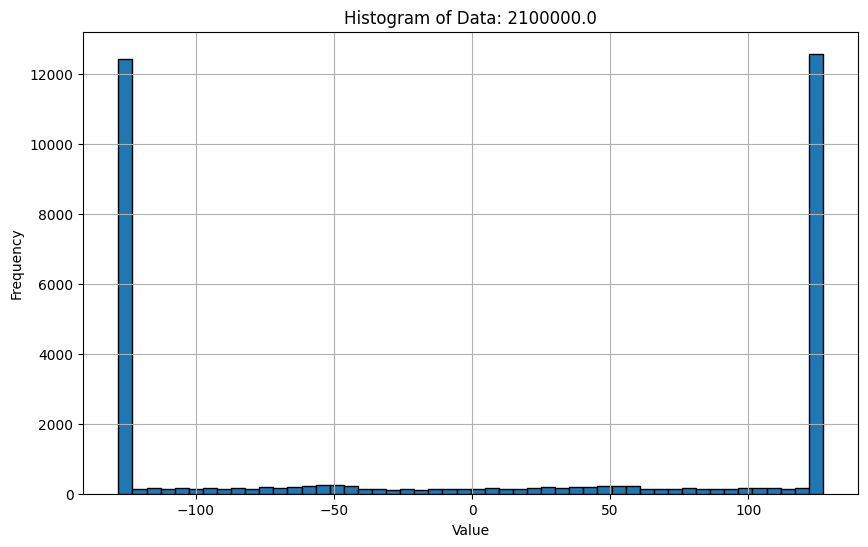

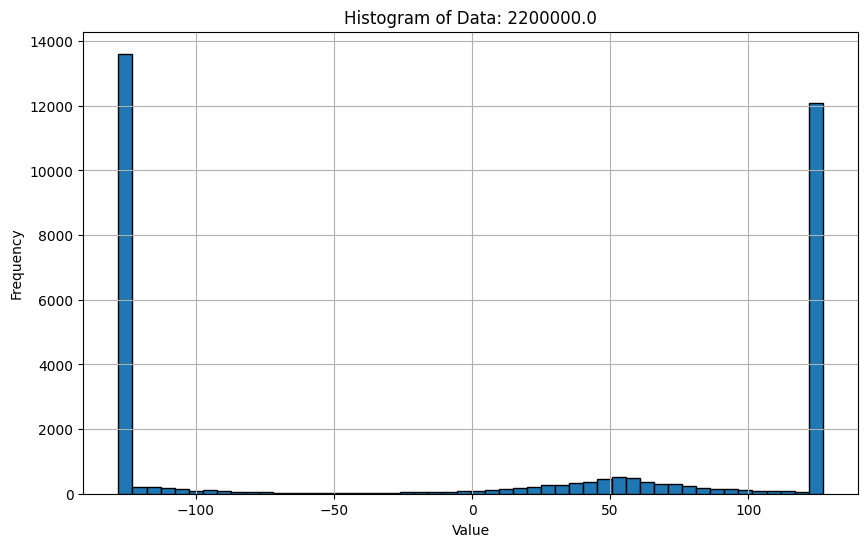

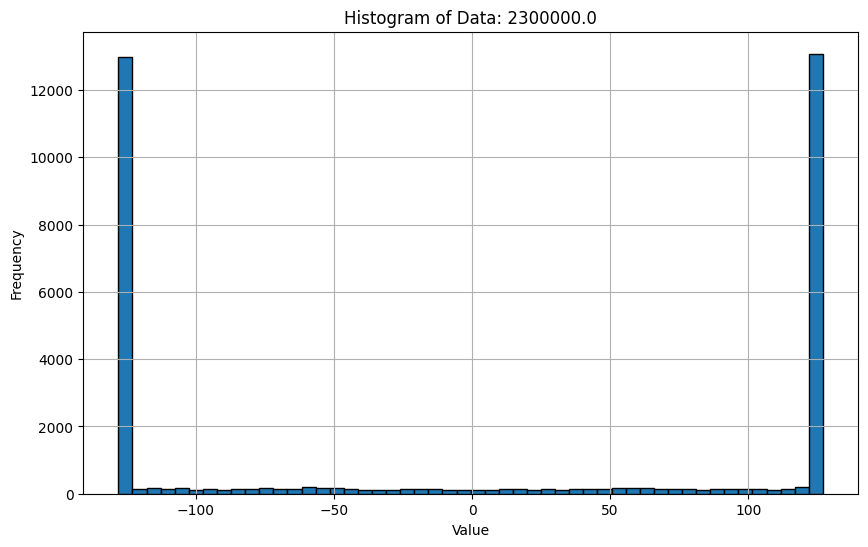

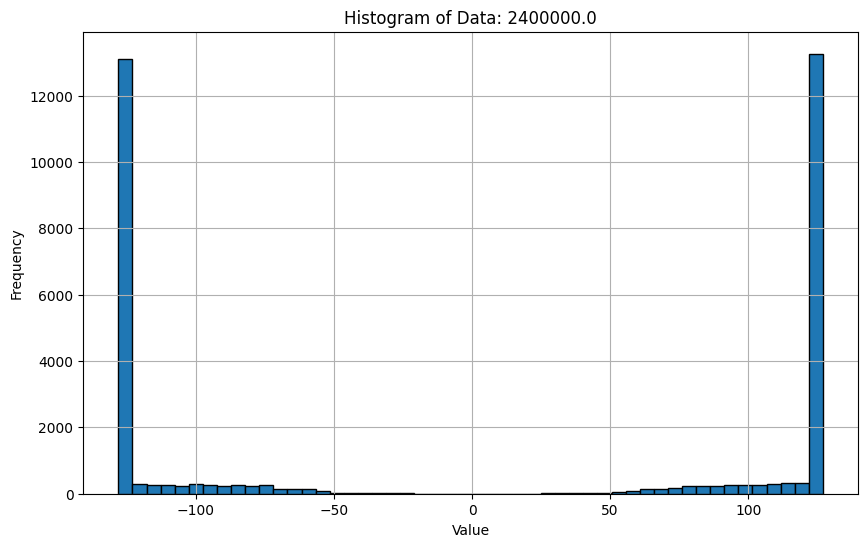

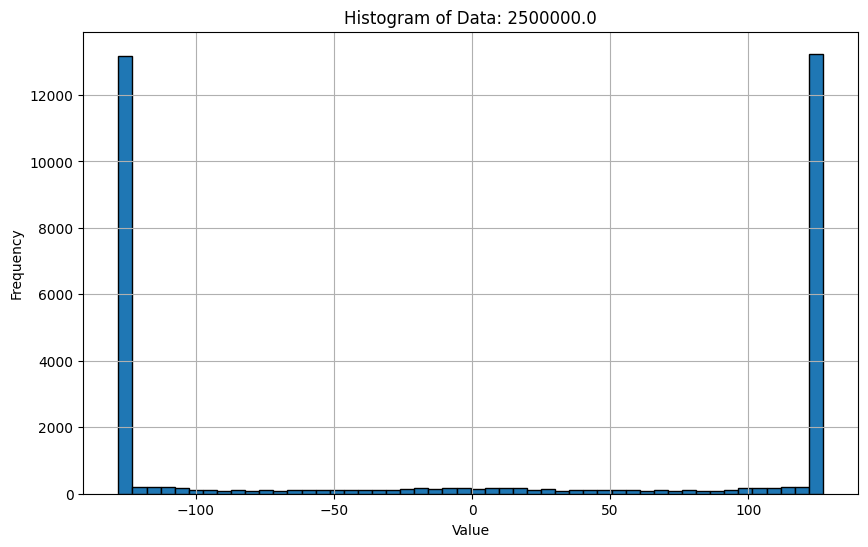

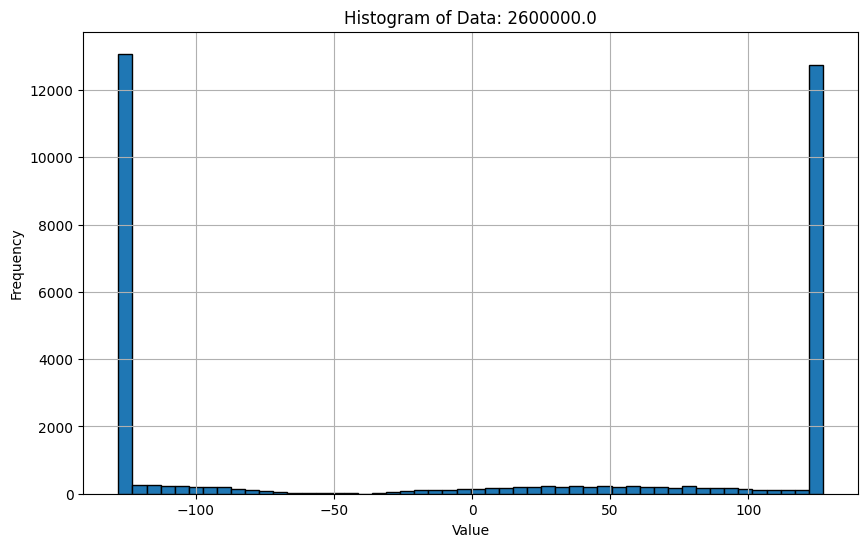

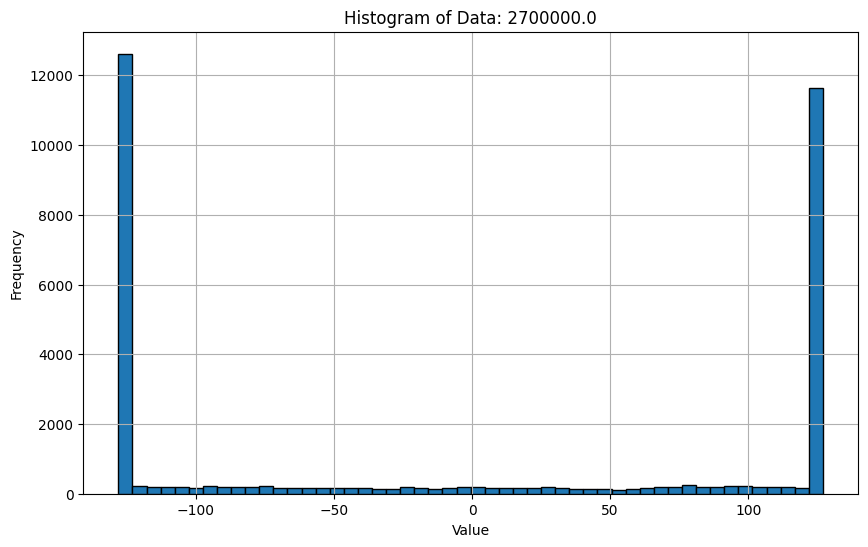

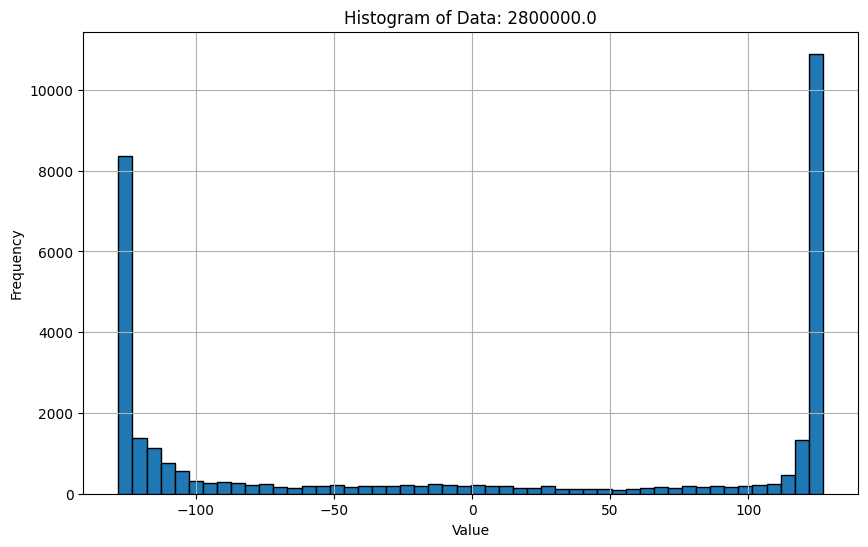

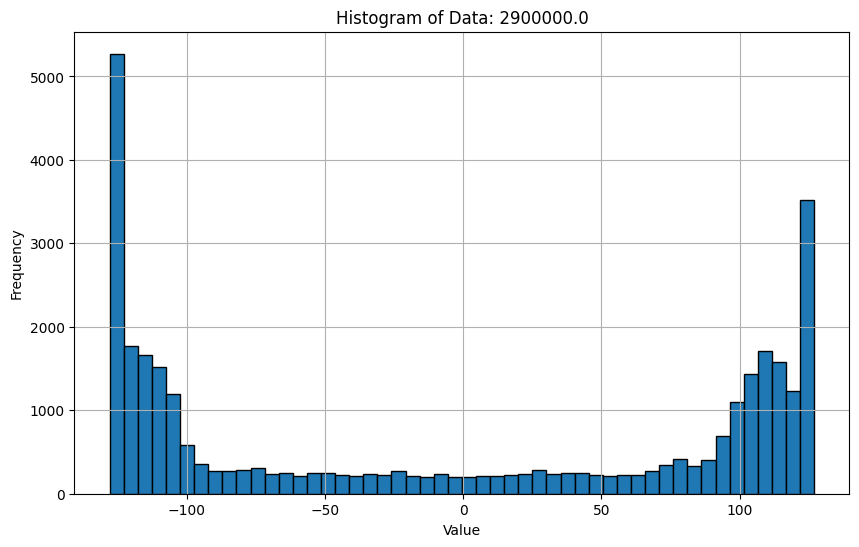

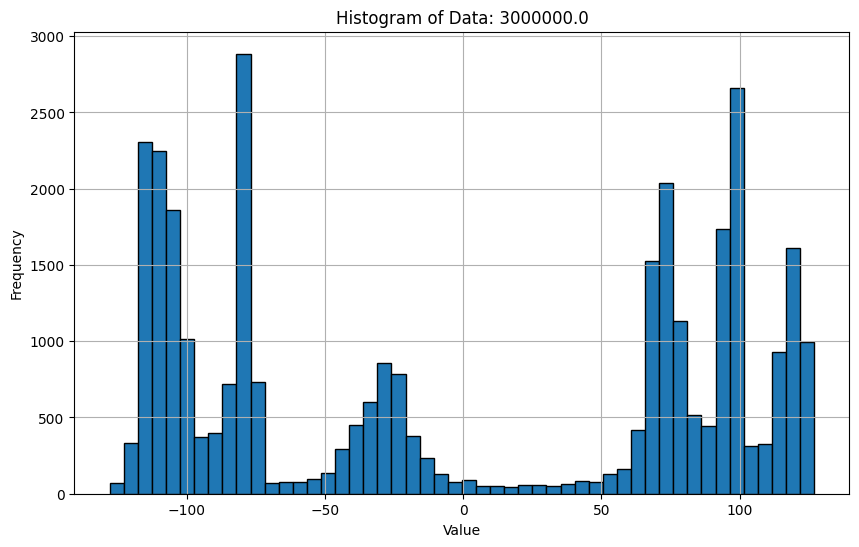

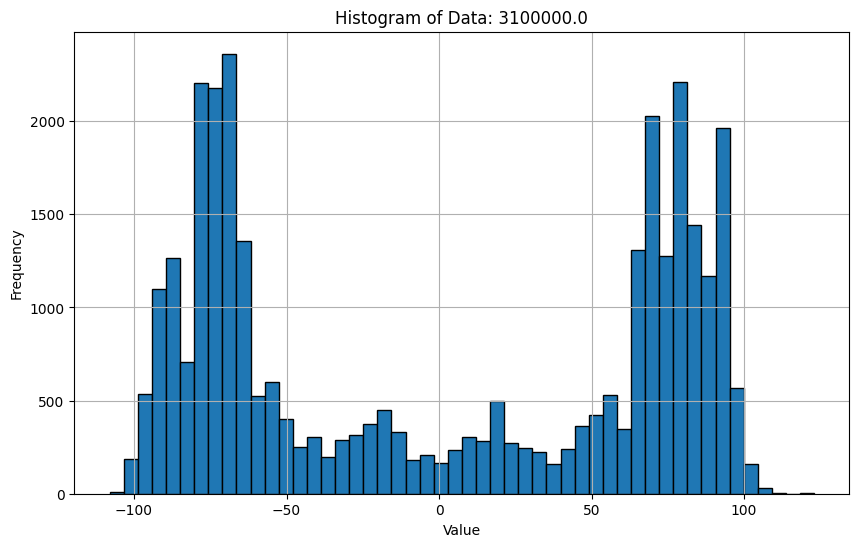

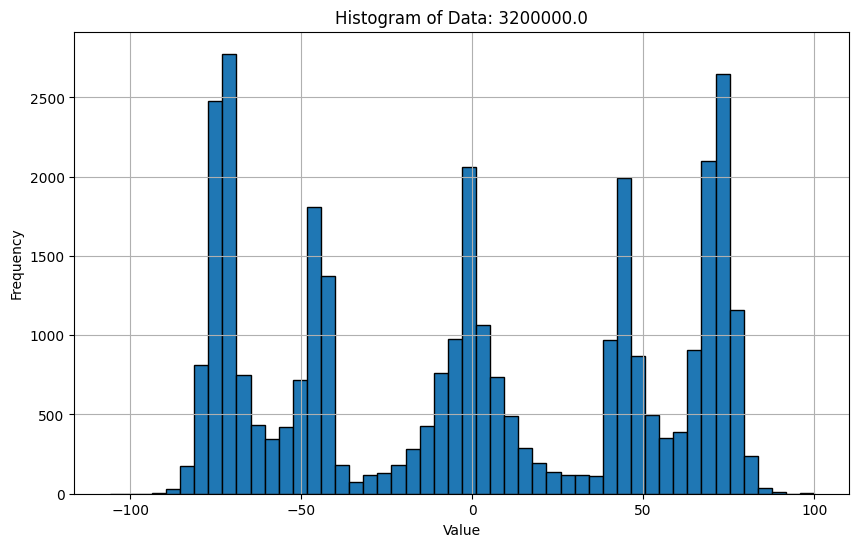

In [43]:
for SAMPLE_RATE in SAMPLE_RATES:
    ng_data = np.load(f"noise_generator_data/{SAMPLE_RATE}_noise_generator_2filter_data.npz")
    plt.figure(figsize=(10, 6))
    ng_full = []
    for i in range(len(ng_data['arr_0'])):
        for j in range(len(ng_data['arr_0'][i])):
            ng_full.append(ng_data['arr_0'][i][j])
    ng_full = np.array(ng_full)
    plt.hist(ng_full, bins=50, edgecolor='black')
    plt.title(f"Histogram of Data: {SAMPLE_RATE}")
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

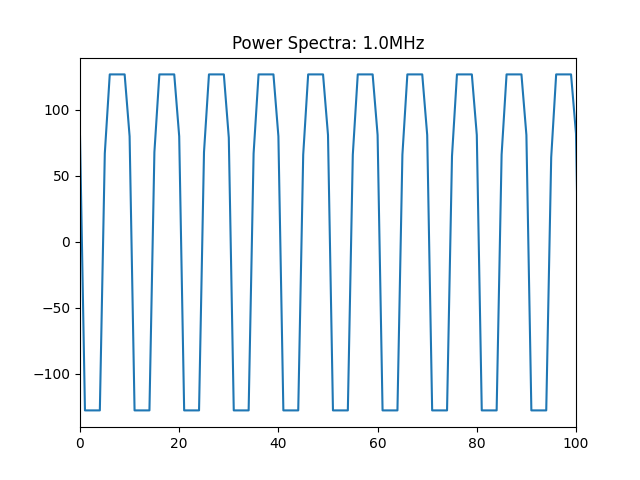

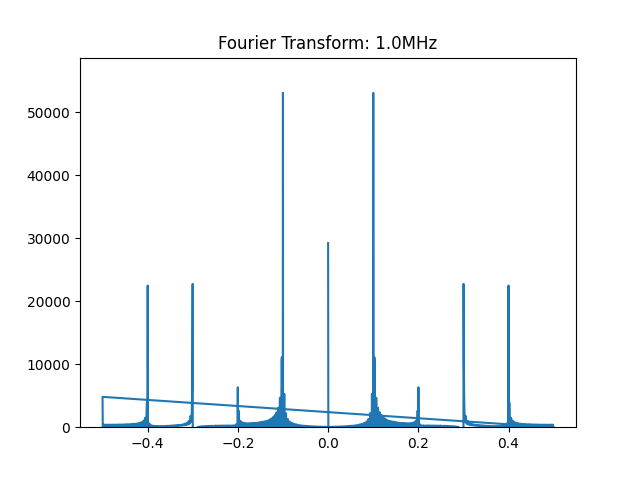

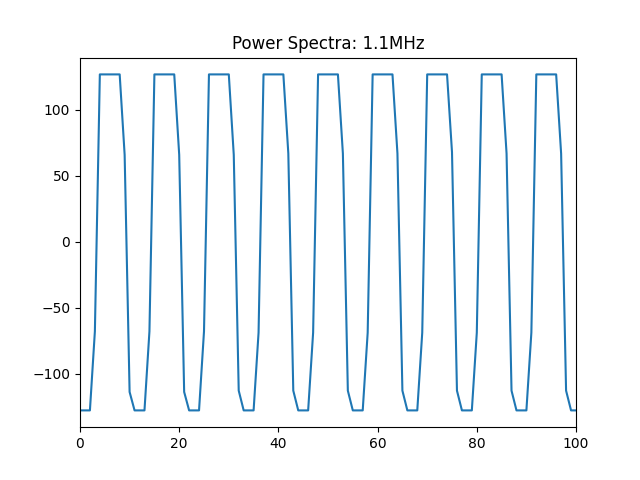

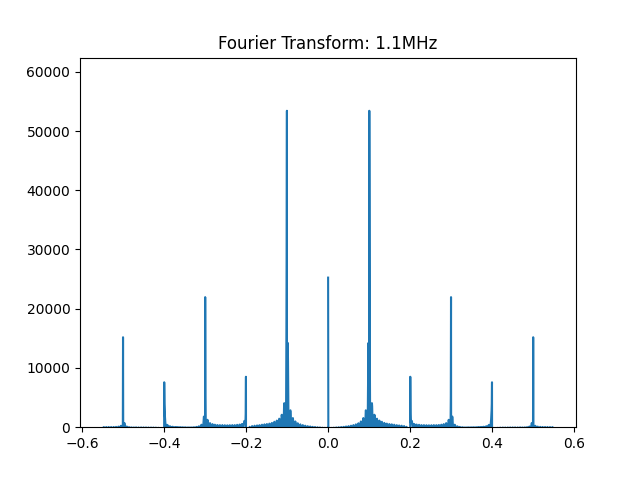

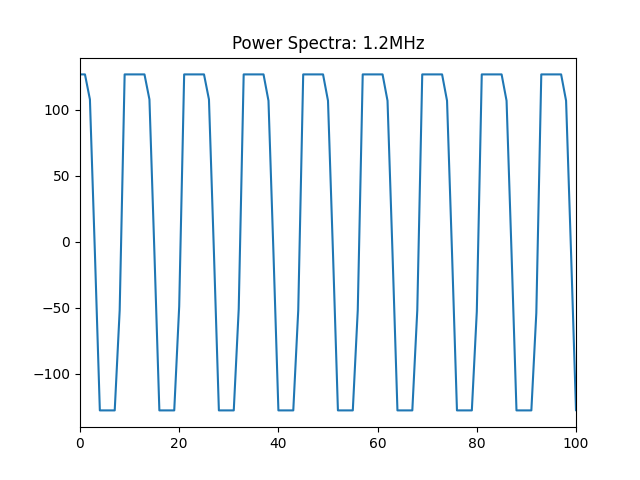

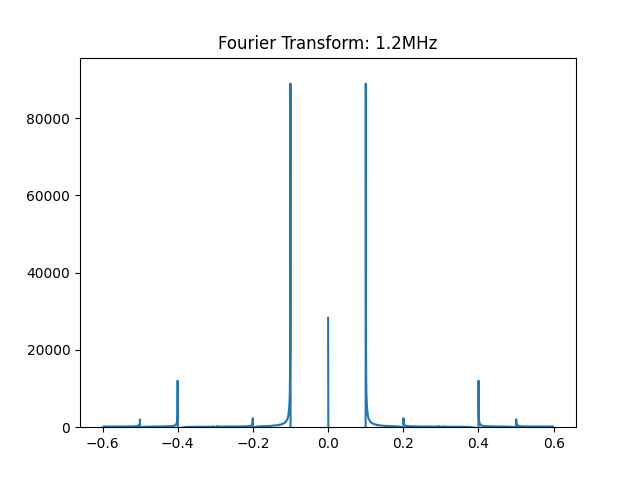

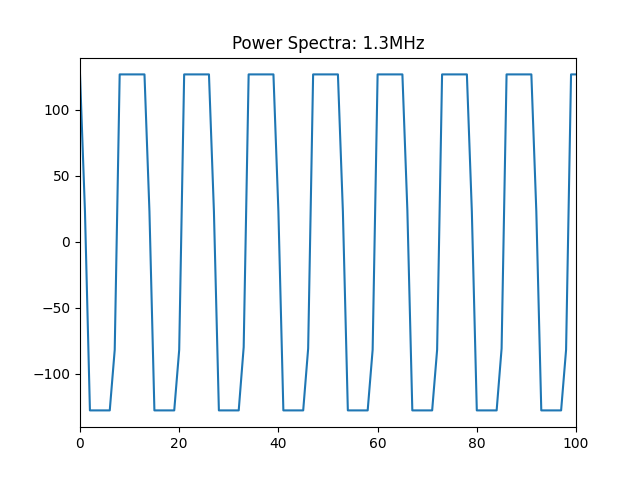

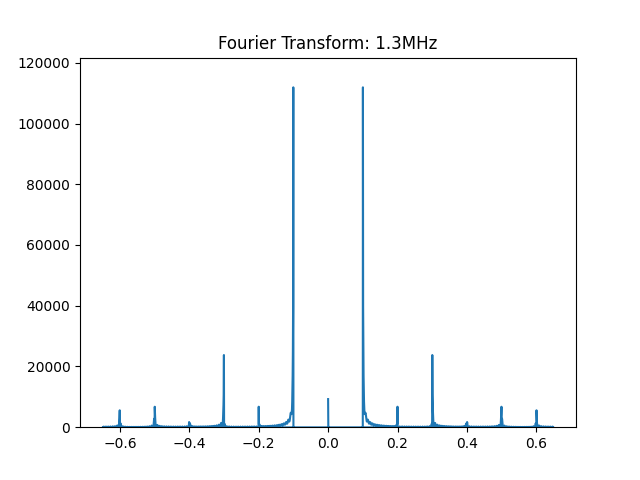

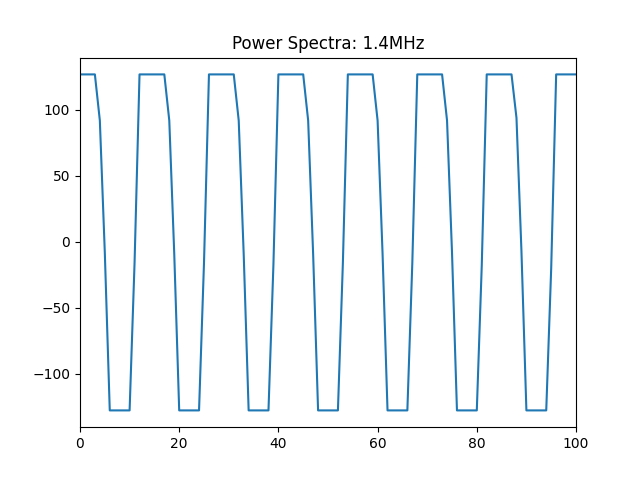

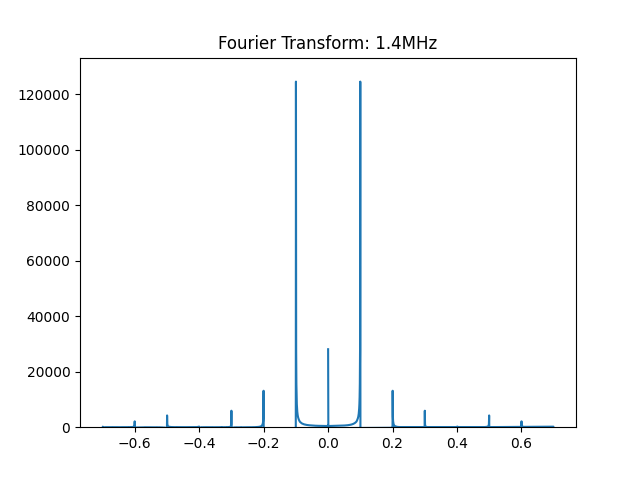

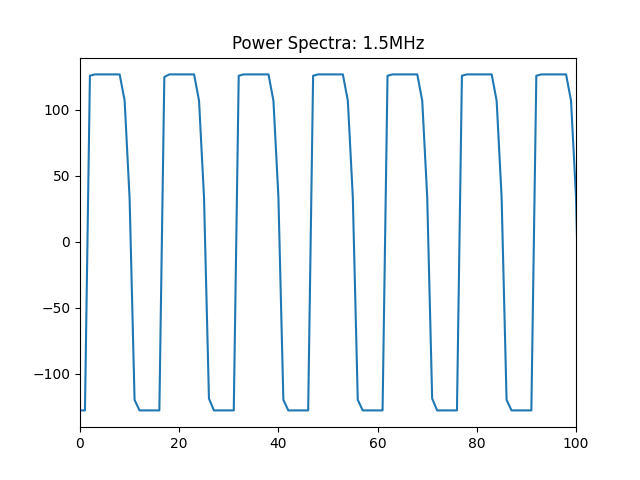

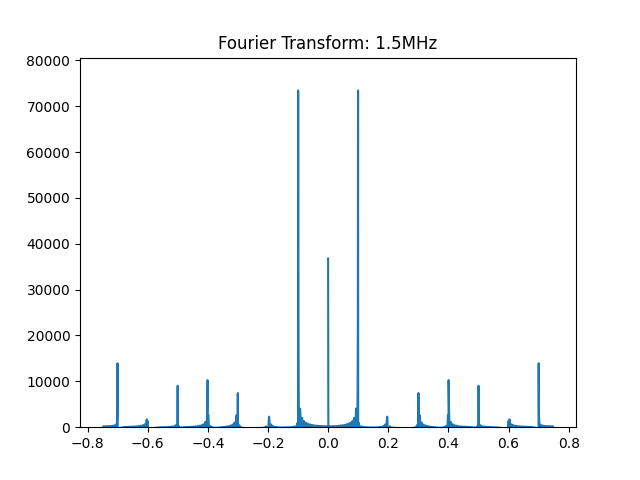

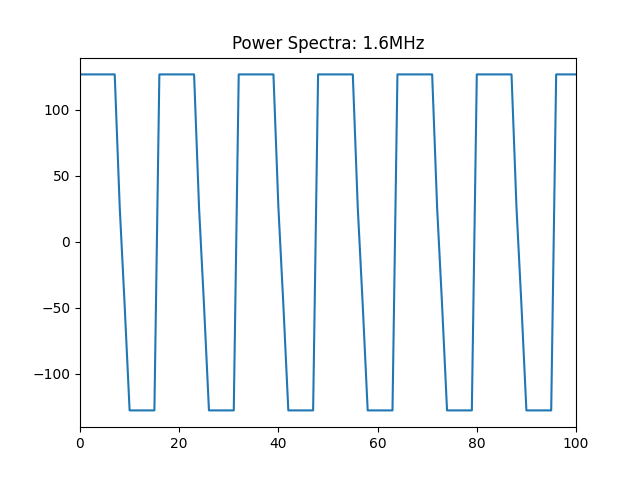

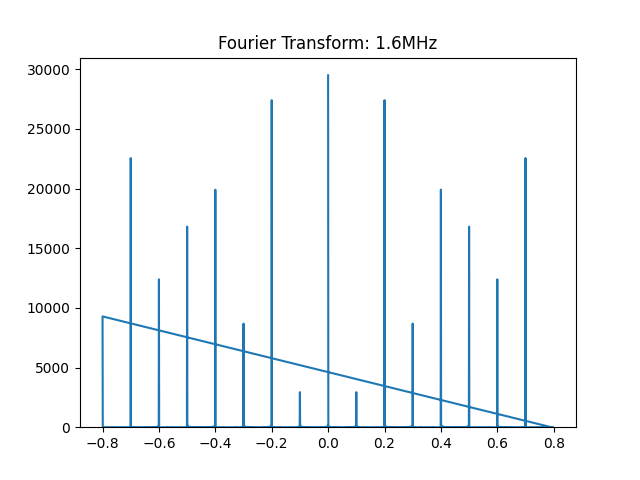

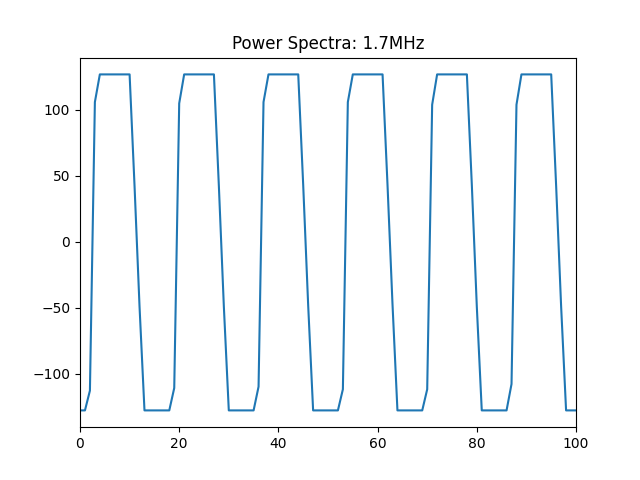

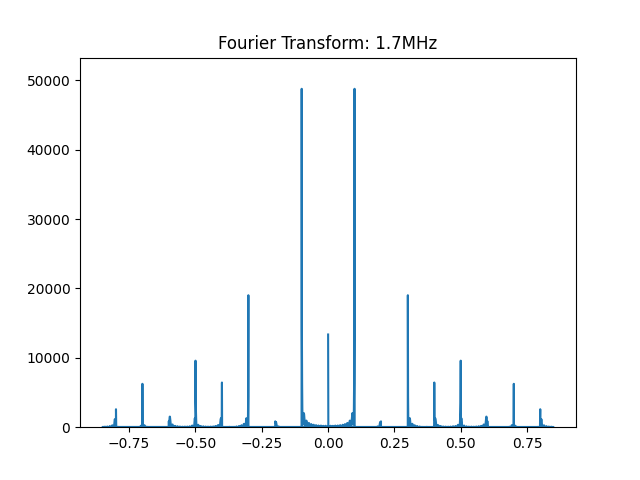

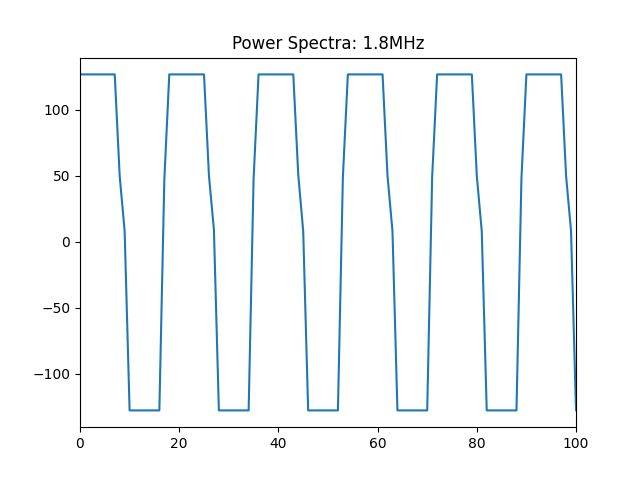

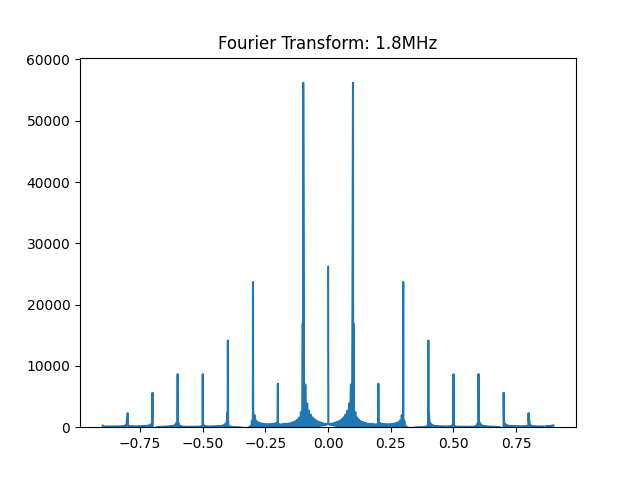

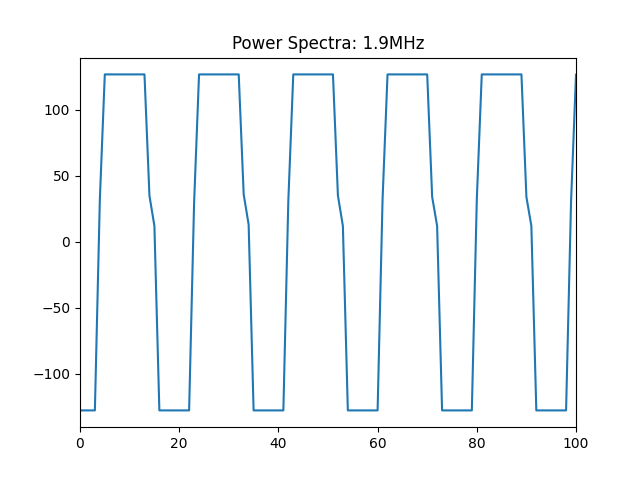

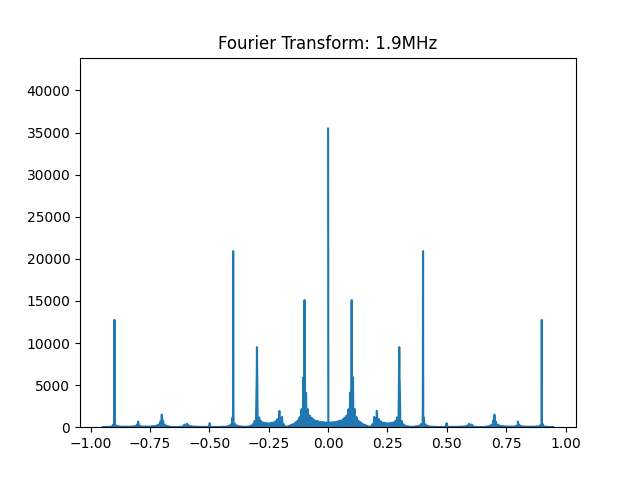

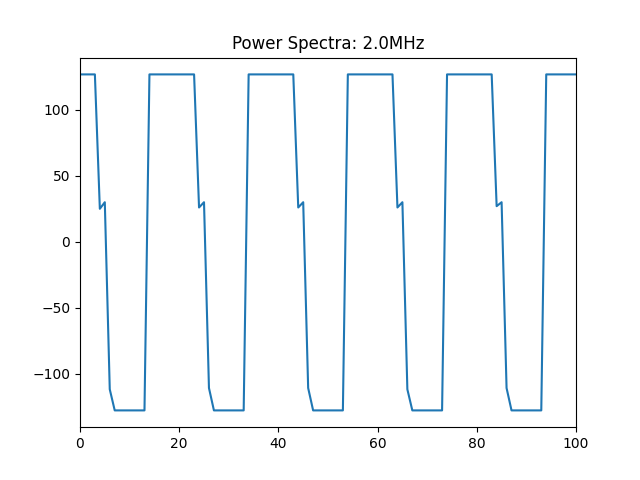

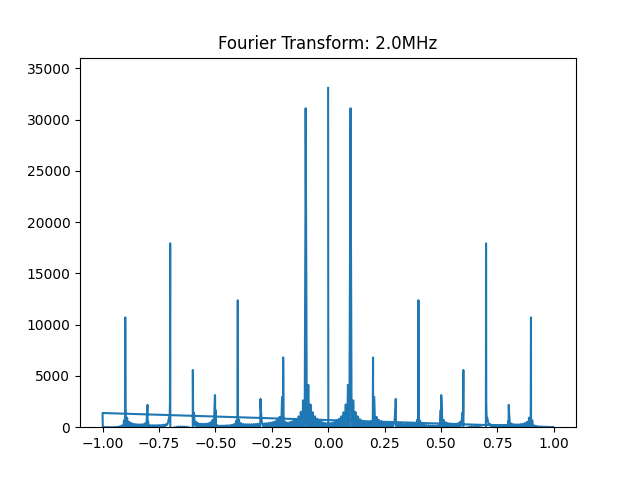

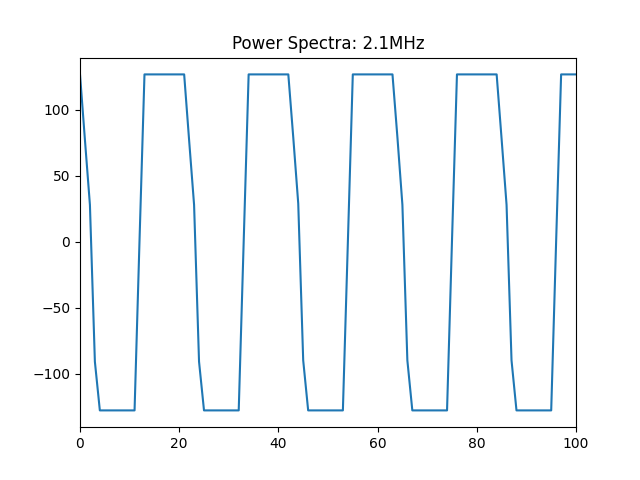

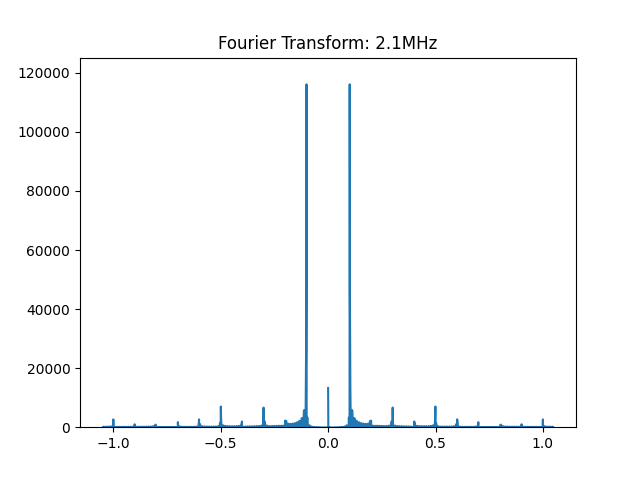

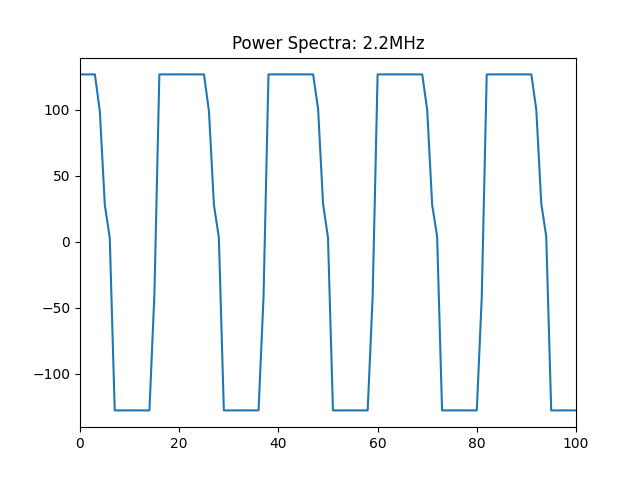

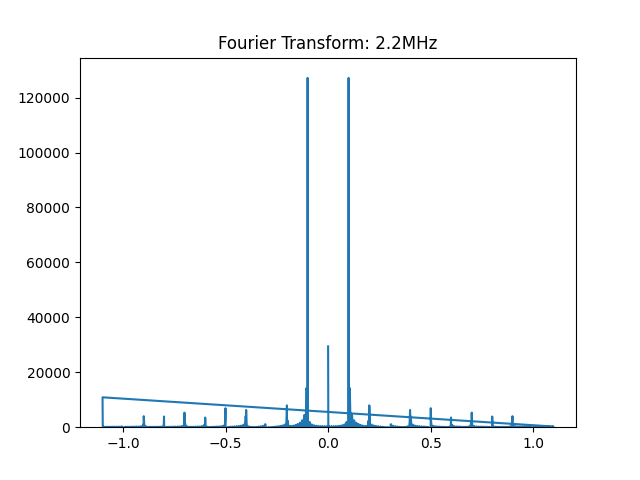

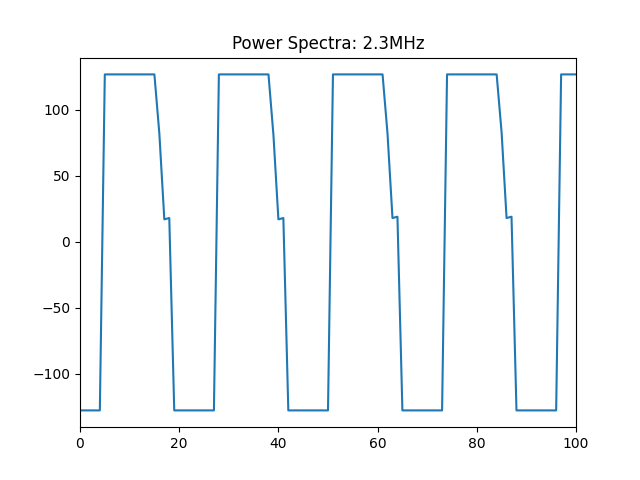

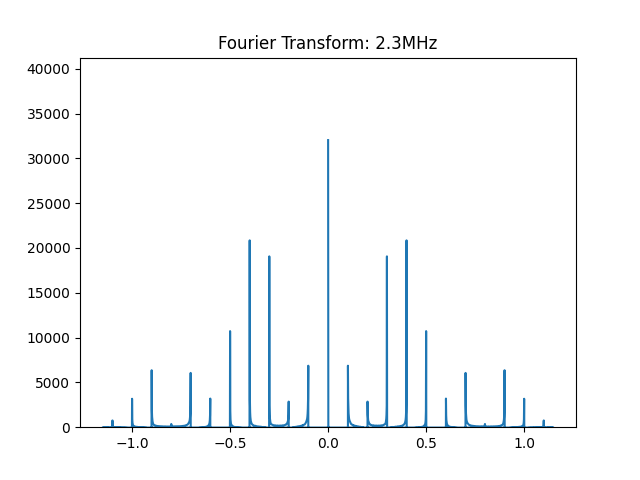

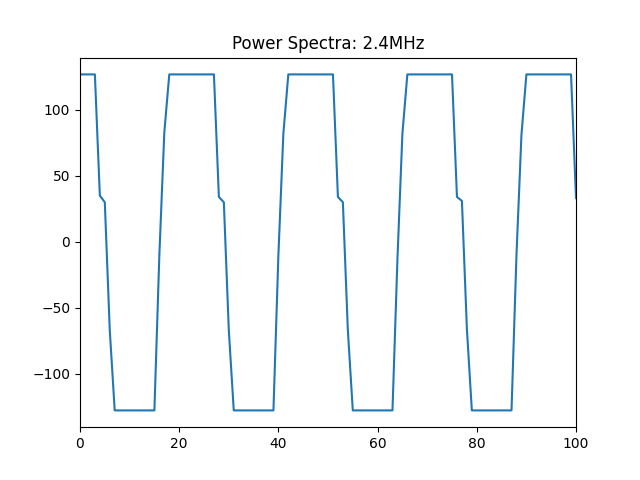

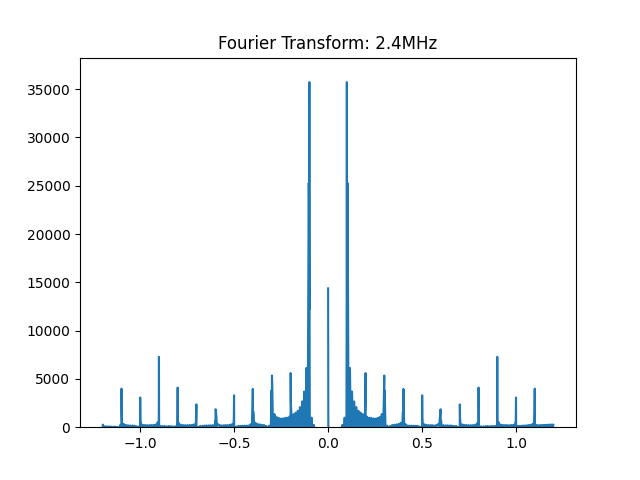

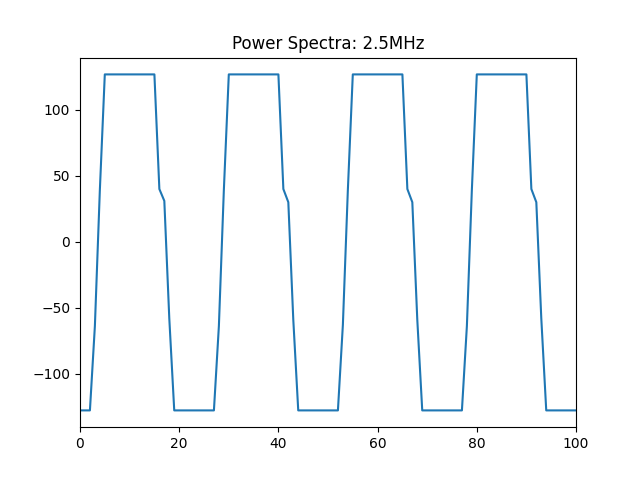

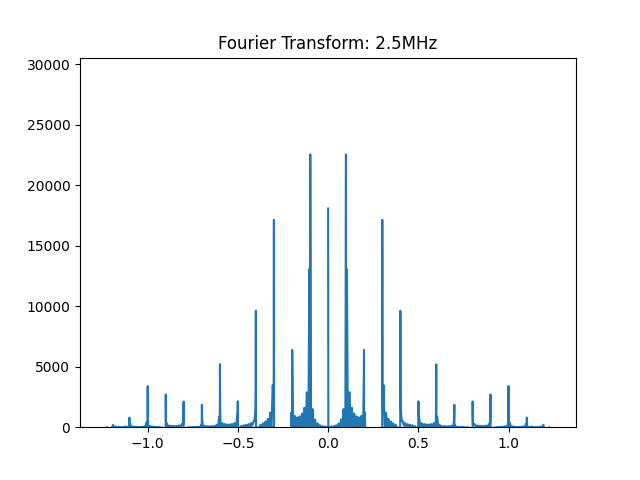

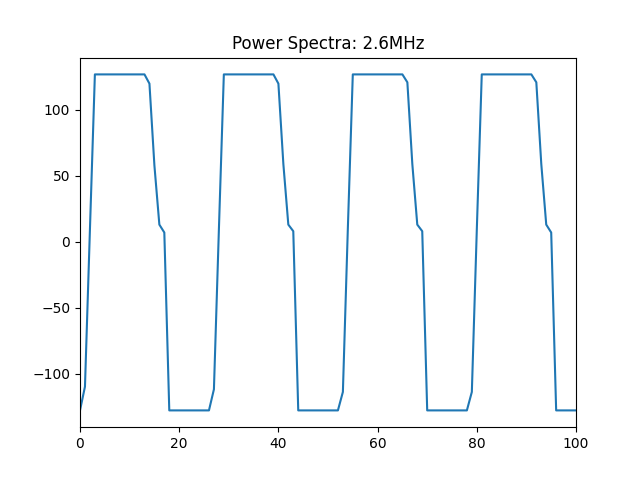

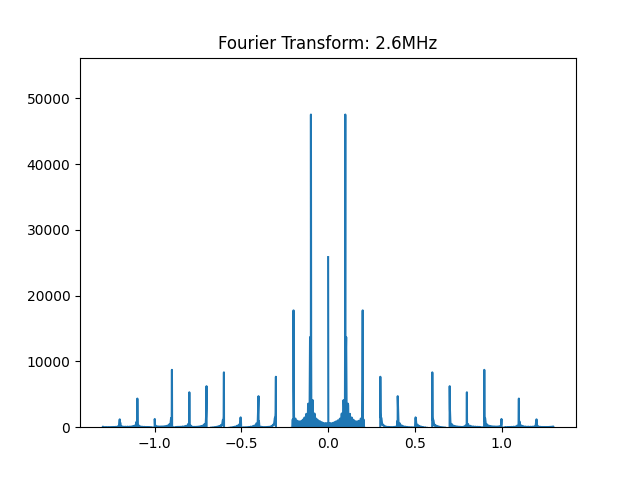

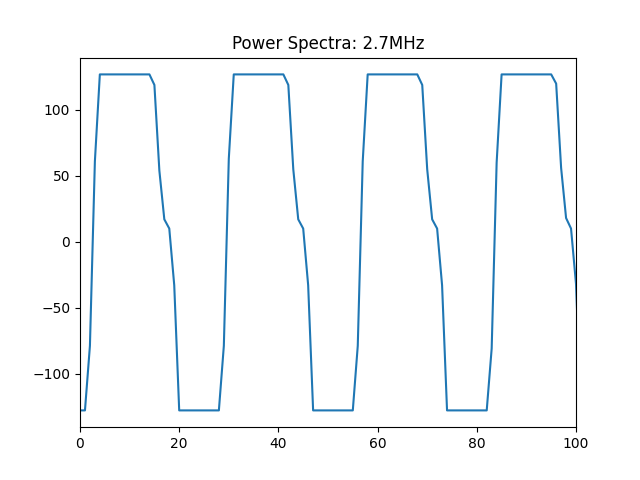

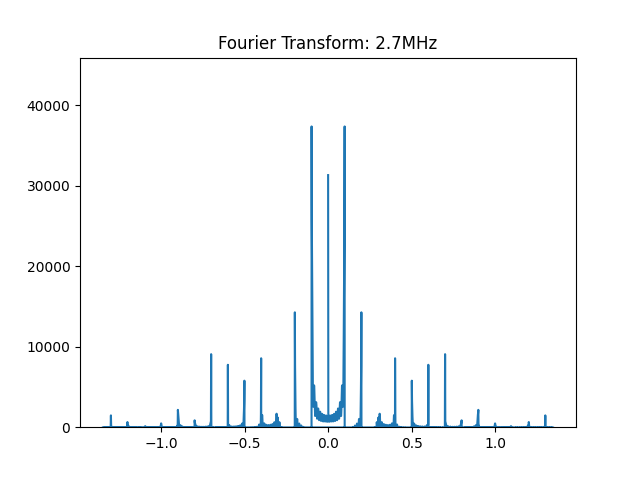

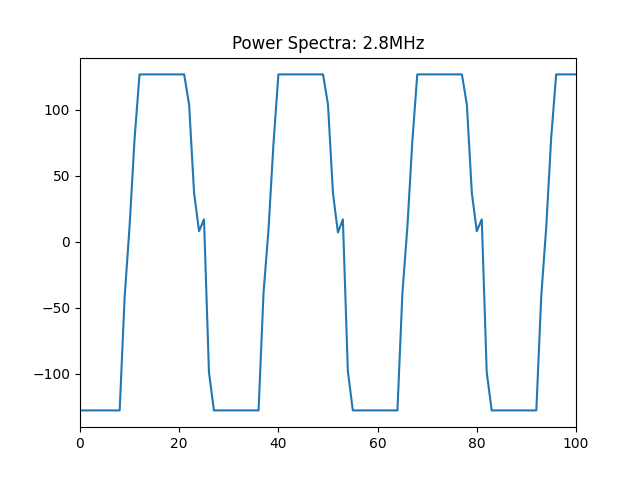

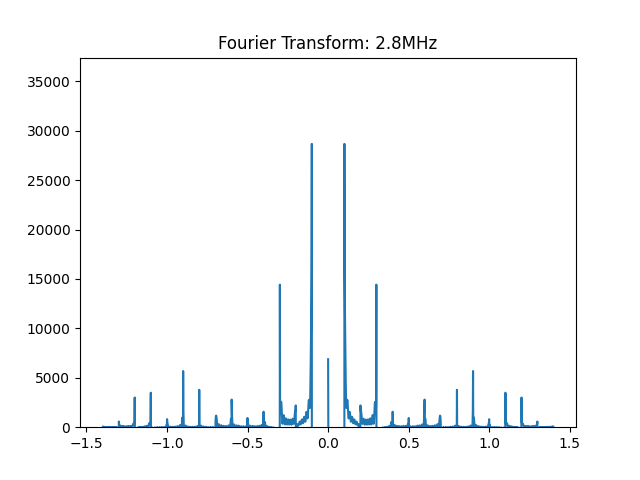

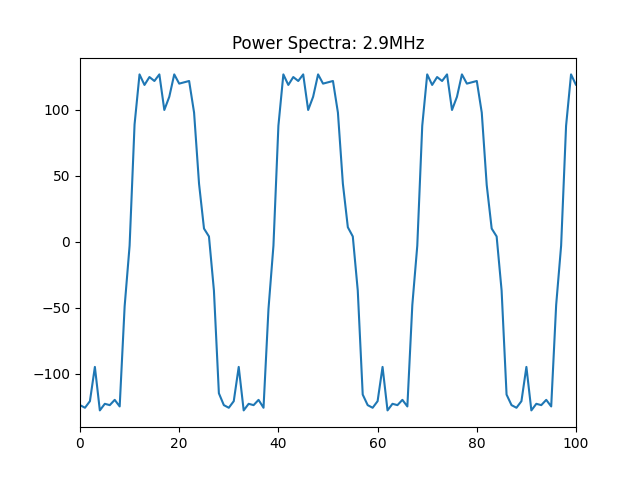

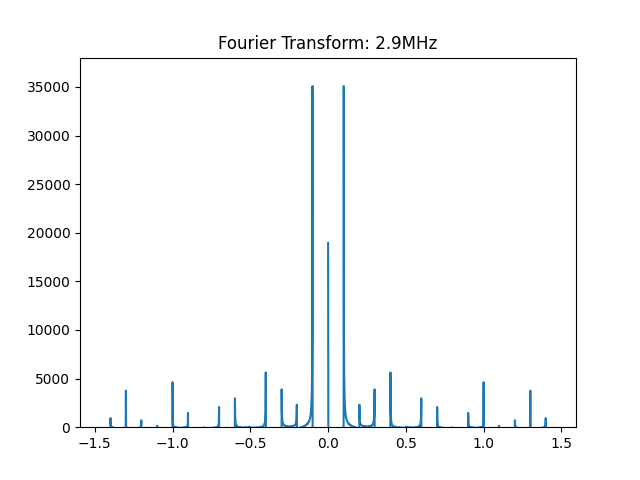

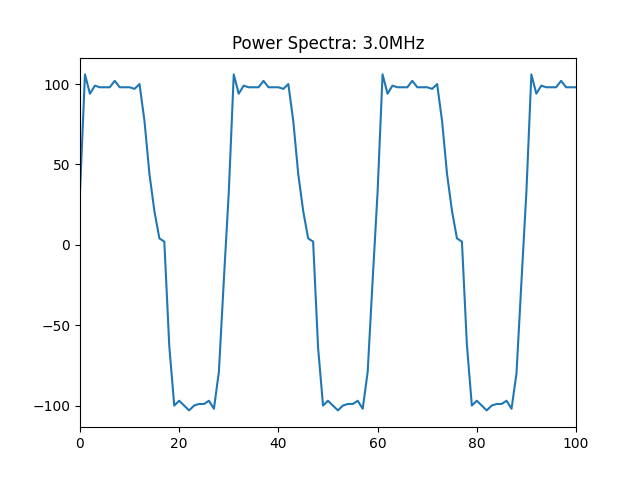

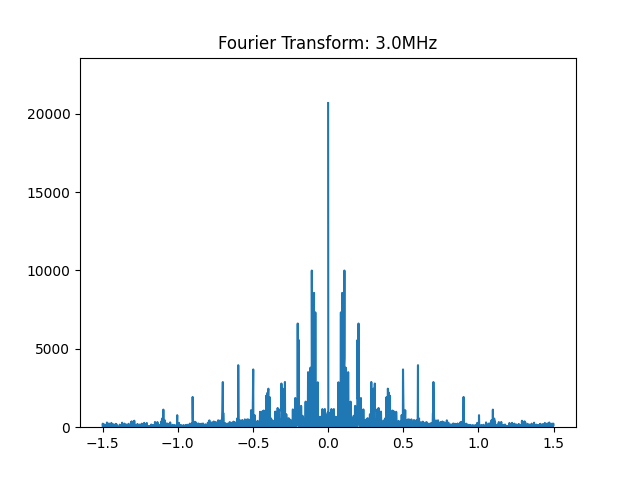

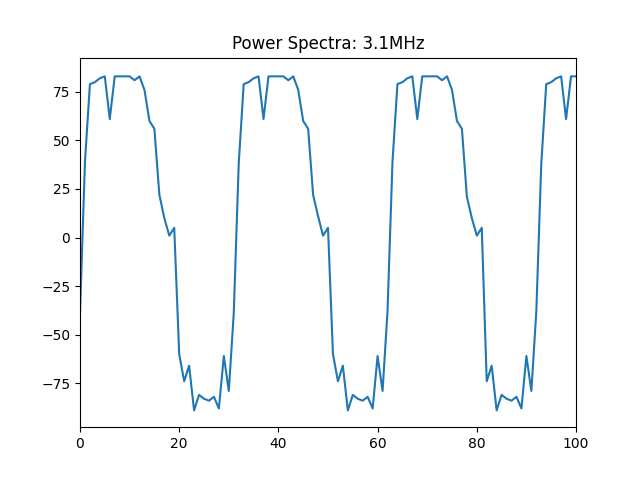

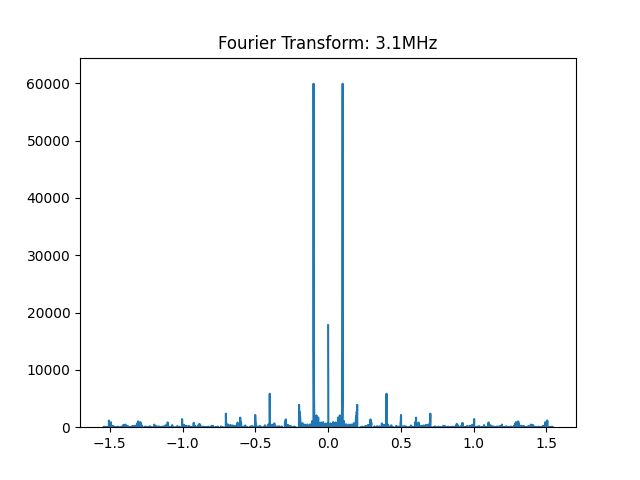

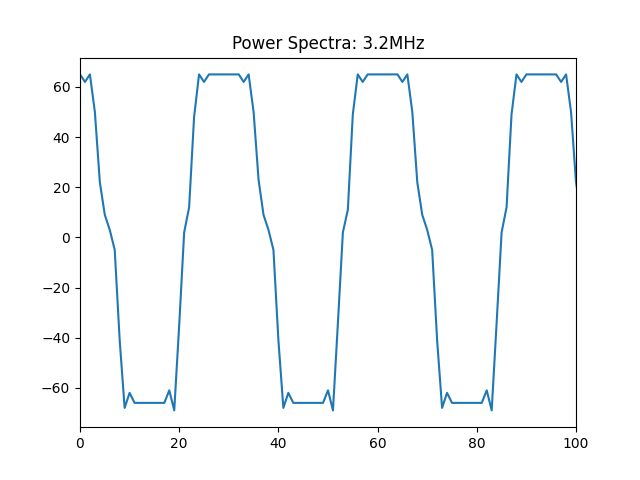

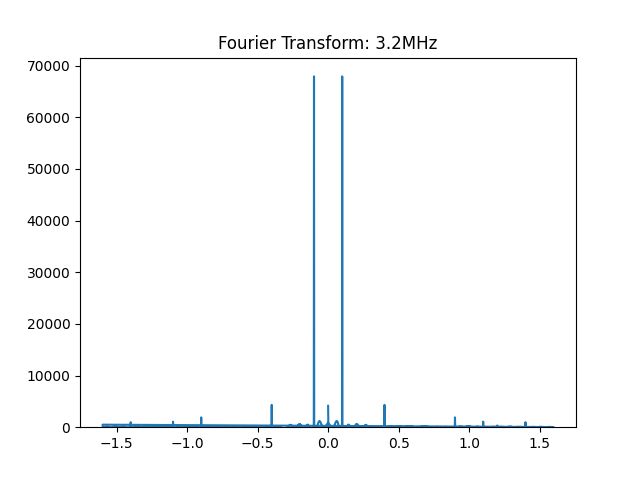

In [5]:
for SAMPLE_RATE in SAMPLE_RATES:
    plt.figure()
    fr_data = np.load(f"sdr_data/{SAMPLE_RATE}_sdr_fr_data.npz")
    plt.plot(fr_data['arr_0'][0])
    ax = plt.gca()
    ax.set_xlim([0, 100])
    plt.title(f"Power Spectra: {SAMPLE_RATE/1e6}MHz")
    plt.show()
    plt.figure()
    fft_transform = np.fft.fft(fr_data['arr_0'][0])
    freq = np.fft.fftfreq(2048, 1/(SAMPLE_RATE/1e6))
    plt.plot(freq, fft_transform.real)
    ax = plt.gca()
    ax.set_ylim(0)
    plt.title(f"Fourier Transform: {SAMPLE_RATE/1e6}MHz")
    plt.show()